In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import datetime as dt
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import lag_plot
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose

Data : https://docs.google.com/spreadsheets/d/1NQt1dTbbF-MUCp8dJWyWLwLW36xErGX1/edit?usp=sharing&ouid=106153166383451073363&rtpof=true&sd=true

`import data`

In [ ]:
data = pd.read_excel("/content/DATA AKUISISI BRIGA .xlsx",sheet_name='HARIAN')
data2 = pd.read_excel("/content/DATA AKUISISI BRIGA .xlsx",sheet_name='MINGGUAN')
data3 = pd.read_excel("/content/DATA AKUISISI BRIGA .xlsx",sheet_name='BULANAN')
data.head()

Tanggal  Beras Premium  Beras Medium  Gula Pasir  Minyak Goreng Curah  \
0 2020-01-01          13197         15859       13736                11770   
1 2020-01-02          13197         15859       13736                11770   
2 2020-01-03          13197         15859       13736                11770   
3 2020-01-04          13197         15859       13736                11770   
4 2020-01-05          13197         15859       13736                11770   

   Minyak Goreng Kemasan Sederhana  Minyak Goreng Kemasan Premium  \
0                            14391                          14508   
1                            14391                          14508   
2                            14391                          14508   
3                            14391                          14508   
4                            14391                          14508   

   Kedelai Impor  Tepung Terigu  Daging Sapi Paha Belakang  Daging Ayam Ras  \
0          11739          11313                     126729            40500   
1          11739          11313                     126729            40500   
2          11739          11313                     126729            40500   
3          11739          11313                     126729            40500   
4          11739          11313                     126729            40500   

   Telur Ayam Ras  Cabe Merah Besar  Cabe Merah  Keriting  Cabe Rawit Merah  \
0           25919             64200                 66700             89900   
1           25919             64200                 66700             89900   
2           25919             64200                 66700             89900   
3           25919             64200                 66700             89900   
4           25919             64200                 66700             89900   

   Bawang Merah   Bawang Putih Honan  
0          38711               29900  
1          38711               29900  
2          38711               29900  
3          38711               29900  
4          38711               29800

`cek tipe data, bentuk data`

In [ ]:
df = [data,data2,data3]
for i in df:
  print(i.info())
  print('')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Tanggal                          808 non-null    datetime64[ns]
 1   Beras Premium                    808 non-null    int64         
 2   Beras Medium                     808 non-null    int64         
 3   Gula Pasir                       808 non-null    int64         
 4   Minyak Goreng Curah              808 non-null    int64         
 5   Minyak Goreng Kemasan Sederhana  808 non-null    int64         
 6   Minyak Goreng Kemasan Premium    808 non-null    int64         
 7   Kedelai Impor                    808 non-null    int64         
 8   Tepung Terigu                    808 non-null    int64         
 9   Daging Sapi Paha Belakang        808 non-null    int64         
 10  Daging Ayam Ras                  808 non-null    int64        

`cek missing value`

In [ ]:
df = [data,data2,data3]
for i in df:
  print(i.isnull().sum())
  print('')

Tanggal                            0
Beras Premium                      0
Beras Medium                       0
Gula Pasir                         0
Minyak Goreng Curah                0
Minyak Goreng Kemasan Sederhana    0
Minyak Goreng Kemasan Premium      0
Kedelai Impor                      0
Tepung Terigu                      0
Daging Sapi Paha Belakang          0
Daging Ayam Ras                    0
Telur Ayam Ras                     0
Cabe Merah Besar                   0
Cabe Merah  Keriting               0
Cabe Rawit Merah                   0
Bawang Merah                       0
Bawang Putih Honan                 0
dtype: int64

Tanggal                            0
Beras Premium                      0
Beras Medium                       0
Gula Pasir                         0
Minyak Goreng Curah                0
Minyak Goreng Kemasan Sederhana    0
Minyak Goreng Kemasan Premium      0
Kedelai Impor                      0
Tepung Terigu                      0
Daging Sapi Paha Belakan

NB : *tidak terdapat missing value dalam data*

#EDA

`melihat pola data terhadap waktu`

In [ ]:
#Pengelompokan Jenis
Beras = ['Beras Premium', 'Beras Medium']
Minyak = ['Minyak Goreng Curah', 'Minyak Goreng Kemasan Sederhana', 'Minyak Goreng Kemasan Premium']
Daging = ['Daging Sapi Paha Belakang', 'Daging Ayam Ras']
AyamRas = ['Daging Ayam Ras', 'Telur Ayam Ras']
Cabe = ['Cabe Merah Besar', 'Cabe Merah  Keriting', 'Cabe Rawit Merah']
Bawang = ['Bawang Merah ', 'Bawang Putih Honan']

#List Jenis
Kategori = [Beras,Minyak,Daging,AyamRas,Cabe,Bawang]

NB : *yang dipakai hanya data harian* (sudah mewakili mingguan, bulanan)

In [ ]:
df = data.copy()
df.index = pd.to_datetime(df['Tanggal'])
df.drop('Tanggal',axis=1,inplace = True)

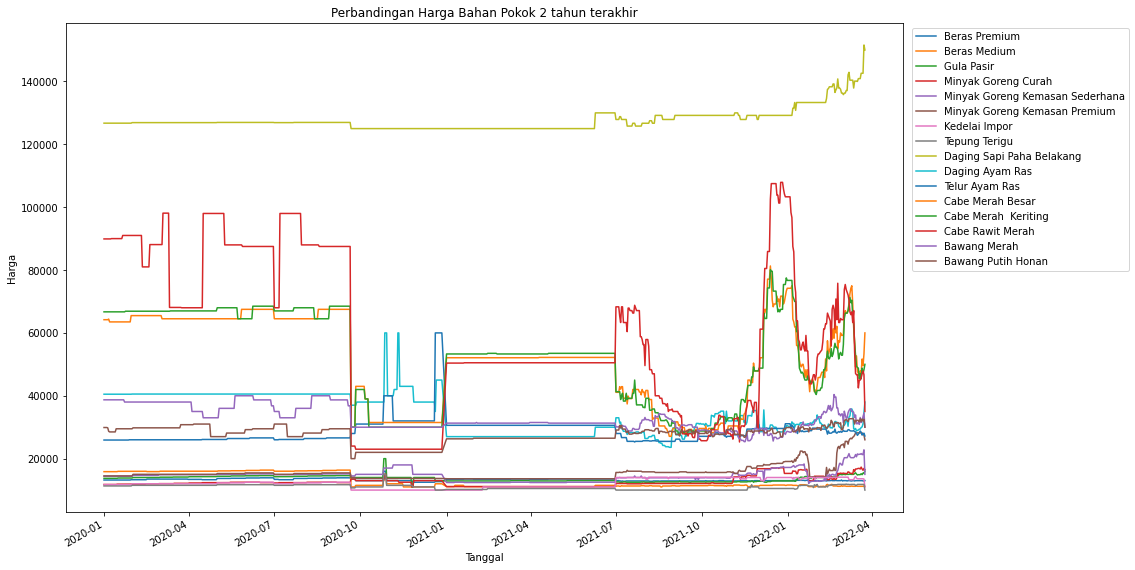

In [ ]:
df.plot(kind='line', figsize=(15, 10))
plt.legend(loc='upper center',bbox_to_anchor=(1.14, 1))
plt.title('Perbandingan Harga Bahan Pokok 2 tahun terakhir')
plt.ylabel('Harga')
plt.xlabel('Tanggal')
plt.show() 

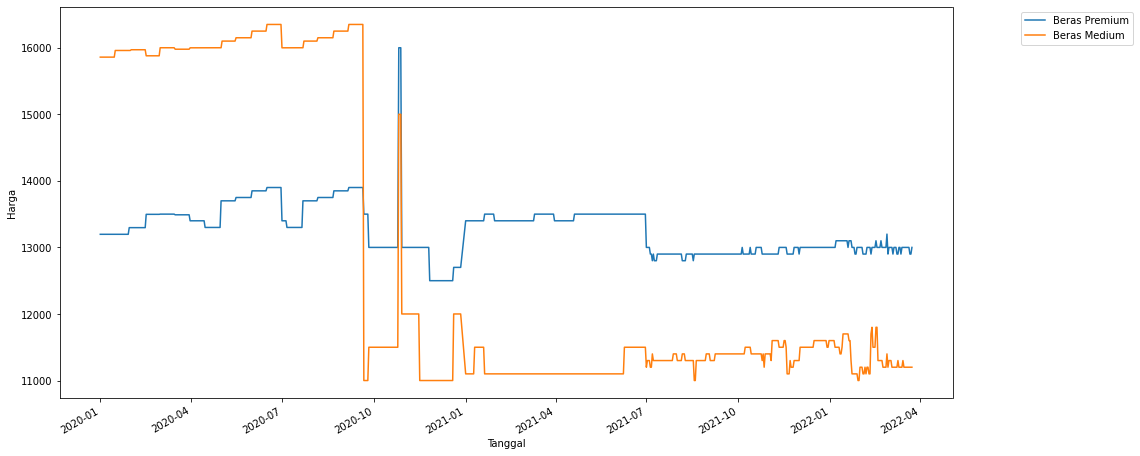

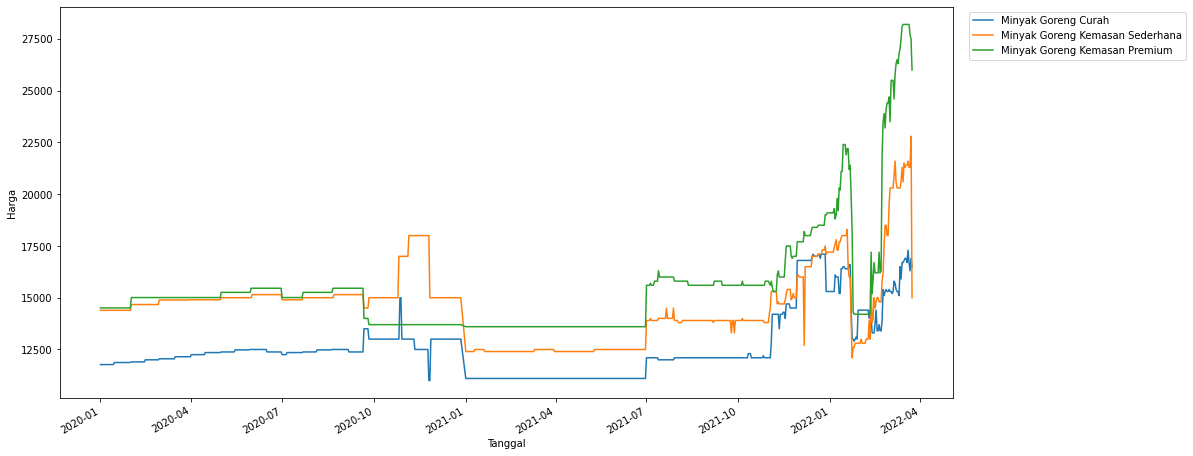

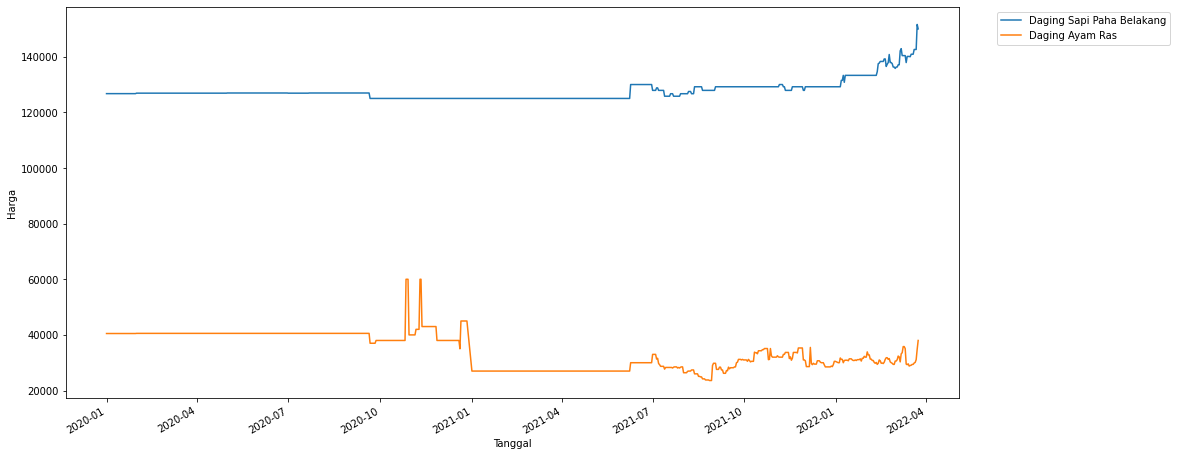

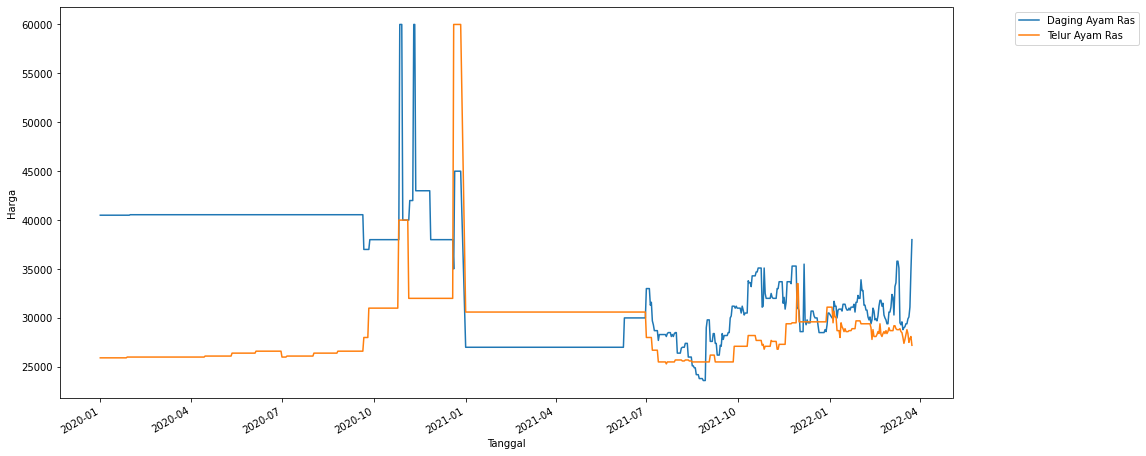

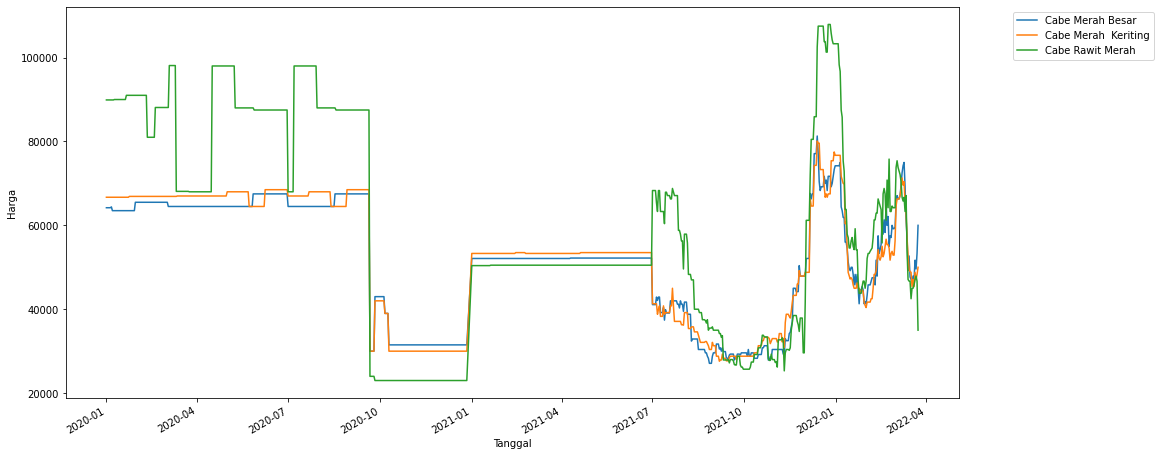

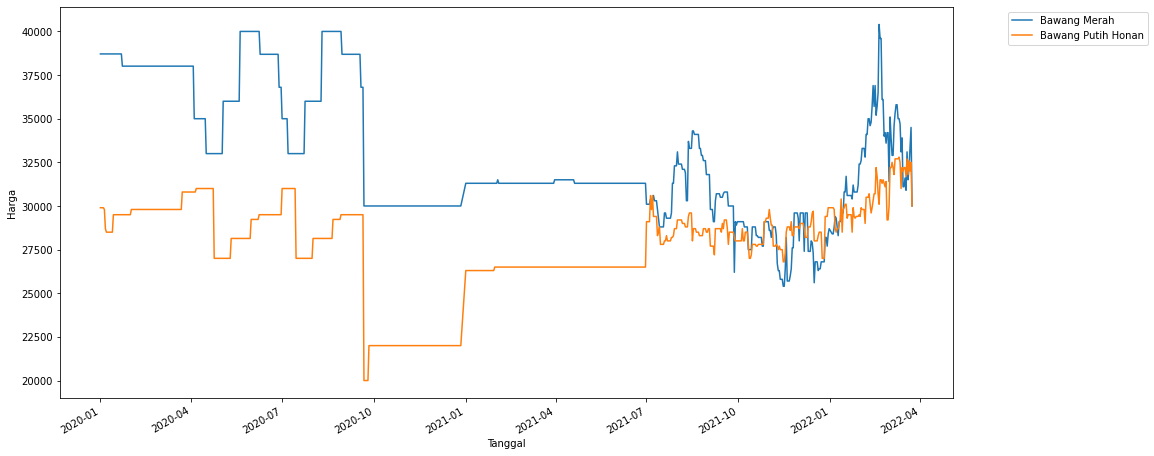

In [ ]:
for i in Kategori:
  dataset = df[i]
  dataset.plot(kind='line', figsize=(16, 8))
  plt.legend(loc='upper center',bbox_to_anchor=(1.14, 1))
  plt.ylabel('Harga')
  plt.xlabel('Tanggal')
  plt.show() 

`Selisih kenaikan harga bahan pokok` dari `2020-01-01` sampai `2022-03-24`

In [ ]:
desc = df.describe().loc[['mean','min','max']].T.reset_index()
tgl = df.loc[['20200101','20220324'],:].T.reset_index()
diff = df.loc[['20200101','20220324'],:].diff().loc['20220324',:].reset_index(drop=True)
diff = pd.DataFrame(list(zip(diff.values.tolist())),columns =['Selisih'])

#gabungkan data statistik deskriptif
stat_deskriptif = pd.concat([desc,tgl,diff],axis=1)
stat_deskriptif = stat_deskriptif.T.drop_duplicates().T

#ubah nama variabel
old_var = stat_deskriptif.columns
new_var = ['Bahan Pokok', 'mean', 'min', 'max', '2020/01/01', '2022/03/24', 'Selisih']
stat_deskriptif.rename(columns=dict(zip(old_var, new_var)), inplace=True)

#tambahkan persentase selisih
stat_deskriptif['Persentase Selisih (%)'] = stat_deskriptif['Selisih']/stat_deskriptif['2020/01/01']*100
stat_deskriptif

Bahan Pokok           mean       min       max  \
0                     Beras Premium   13264.938119   12500.0   16000.0   
1                      Beras Medium   12884.199257   11000.0   16350.0   
2                        Gula Pasir   13576.212871   11000.0   20000.0   
3               Minyak Goreng Curah    12589.80198   11000.0   17300.0   
4   Minyak Goreng Kemasan Sederhana   14584.506188   12100.0   22800.0   
5     Minyak Goreng Kemasan Premium   15424.272277   13600.0   28200.0   
6                     Kedelai Impor   12174.962871   10000.0   14300.0   
7                     Tepung Terigu    10928.50495   10000.0   15000.0   
8         Daging Sapi Paha Belakang  127695.160891  125000.0  151600.0   
9                   Daging Ayam Ras   34211.386139   23600.0   60000.0   
10                   Telur Ayam Ras   28703.626238   25300.0   60000.0   
11                 Cabe Merah Besar   51605.321782   27100.0   81300.0   
12             Cabe Merah  Keriting   52230.445545   27600.0   80100.0   
13                 Cabe Rawit Merah   59653.094059   23000.0  107900.0   
14                    Bawang Merah     32856.14604   25400.0   40400.0   
15               Bawang Putih Honan   27690.940594   20000.0   32800.0   

   2020/01/01 2022/03/24  Selisih Persentase Selisih (%)  
0       13197      13000   -197.0              -1.492764  
1       15859      11200  -4659.0              -29.37764  
2       13736      16000   2264.0              16.482236  
3       11770      16500   4730.0              40.186916  
4       14391      15000    609.0               4.231812  
5       14508      26000  11492.0               79.21147  
6       11739      11000   -739.0              -6.295255  
7       11313      10000  -1313.0             -11.606117  
8      126729     150000  23271.0              18.362806  
9       40500      38000  -2500.0               -6.17284  
10      25919      27200   1281.0                4.94232  
11      64200      60000  -4200.0              -6.542056  
12      66700      50000 -16700.0             -25.037481  
13      89900      35000 -54900.0             -61.067853  
14      38711      30000  -8711.0             -22.502648  
15      29900      30000    100.0               0.334448

`cek autokorelasi`

NB : *tidak menjadi asumsi utama karena tidak terdapat variabel Y dalam data*

In [ ]:
def autokorelasi(data):
  col = data.drop('Tanggal',axis=1).columns
  frame = []
  for i in col:
    nilai = data[i].autocorr()
    frame.append(nilai)
    print('variabel {} memiliki autokorelasi sebesar {}'.format(i,nilai))
    if nilai > 0:
      print('autokorelasi positif, mengikuti tren')
    else:
      None
    print('') 
  print('')
  return pd.DataFrame(frame).plot(kind='line',title='Visualisasi Nilai Autokorelasi Data')

**data harian**

variabel Beras Premium memiliki autokorelasi sebesar 0.9110050376866732
autokorelasi positif, mengikuti tren

variabel Beras Medium memiliki autokorelasi sebesar 0.99314282135663
autokorelasi positif, mengikuti tren

variabel Gula Pasir memiliki autokorelasi sebesar 0.9217785719332331
autokorelasi positif, mengikuti tren

variabel Minyak Goreng Curah memiliki autokorelasi sebesar 0.9845610232721167
autokorelasi positif, mengikuti tren

variabel Minyak Goreng Kemasan Sederhana memiliki autokorelasi sebesar 0.9705664506292511
autokorelasi positif, mengikuti tren

variabel Minyak Goreng Kemasan Premium memiliki autokorelasi sebesar 0.9908290390484112
autokorelasi positif, mengikuti tren

variabel Kedelai Impor memiliki autokorelasi sebesar 0.9913877680621646
autokorelasi positif, mengikuti tren

variabel Tepung Terigu memiliki autokorelasi sebesar 0.9495096875912465
autokorelasi positif, mengikuti tren

variabel Daging Sapi Paha Belakang memiliki autokorelasi sebesar 0.9873329290112418
au

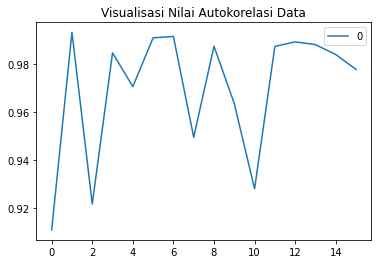

In [ ]:
autokorelasi(data)

**data mingguan**

variabel Beras Premium memiliki autokorelasi sebesar 0.8836407996370701
autokorelasi positif, mengikuti tren

variabel Beras Medium memiliki autokorelasi sebesar 0.9832051844595899
autokorelasi positif, mengikuti tren

variabel Gula Pasir memiliki autokorelasi sebesar 0.9439996164043984
autokorelasi positif, mengikuti tren

variabel Minyak Goreng Curah memiliki autokorelasi sebesar 0.9535494650439247
autokorelasi positif, mengikuti tren

variabel Minyak Goreng Kemasan Sederhana memiliki autokorelasi sebesar 0.9209155182696206
autokorelasi positif, mengikuti tren

variabel Minyak Goreng Kemasan Premium memiliki autokorelasi sebesar 0.9401995472868514
autokorelasi positif, mengikuti tren

variabel Kedelai Impor memiliki autokorelasi sebesar 0.971629388827445
autokorelasi positif, mengikuti tren

variabel Tepung Terigu memiliki autokorelasi sebesar 0.9473868822185056
autokorelasi positif, mengikuti tren

variabel Daging Sapi Paha Belakang memiliki autokorelasi sebesar 0.9665315368861815
a

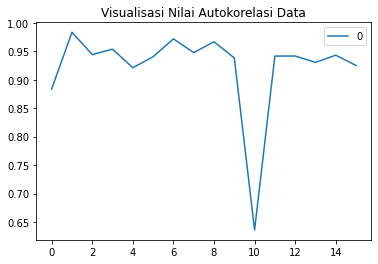

In [ ]:
autokorelasi(data2)

**data bulanan**

variabel Beras Premium memiliki autokorelasi sebesar 0.6005336164746938
autokorelasi positif, mengikuti tren

variabel Beras Medium memiliki autokorelasi sebesar 0.9530130568156996
autokorelasi positif, mengikuti tren

variabel Gula Pasir memiliki autokorelasi sebesar 0.900925551331888
autokorelasi positif, mengikuti tren

variabel Minyak Goreng Curah memiliki autokorelasi sebesar 0.7984324850130018
autokorelasi positif, mengikuti tren

variabel Minyak Goreng Kemasan Sederhana memiliki autokorelasi sebesar 0.4928303123318081
autokorelasi positif, mengikuti tren

variabel Minyak Goreng Kemasan Premium memiliki autokorelasi sebesar 0.5605222267205912
autokorelasi positif, mengikuti tren

variabel Kedelai Impor memiliki autokorelasi sebesar 0.8947365374270813
autokorelasi positif, mengikuti tren

variabel Tepung Terigu memiliki autokorelasi sebesar 0.8922250199978228
autokorelasi positif, mengikuti tren

variabel Daging Sapi Paha Belakang memiliki autokorelasi sebesar 0.956441632716241
au

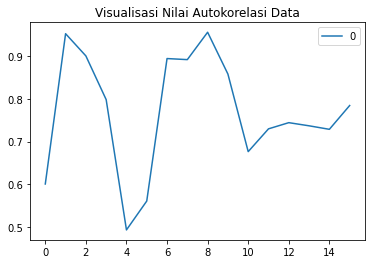

In [ ]:
autokorelasi(data3)

NB : *semua bahan pokok dalam data harian, mingguan, bulanan mengikuti trend*

`cek korelasi`

**data harian**

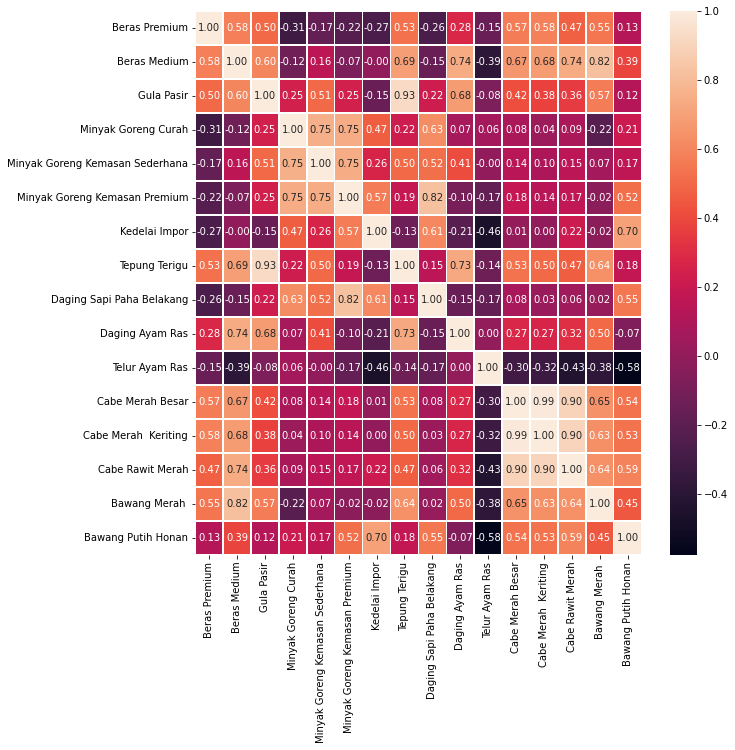

In [ ]:
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)

insight ; `diatas 0.5 // korelasi kuat`
*   Harga variabel Beras Premium berkorelasi kuat setiap harinya dengan Beras Medium, Gula Pasir, Tepung Terigu, Cabe Merah Besar, Cabe Merah Keriting,dan Bawang Merah.
*   Harga variabel Beras Medium berkorelasi kuat setiap harinya dengan Beras Premium, Gula Pasir, Tepung Terigu, Daging Ayam Ras, Cabe Merah Besar, Cabe  Merah  Keriting, Cabe Rawit Merah, dan Bawang Merah.
*   Harga variabel Gula Pasir berkorelasi kuat setiap harinya dengan Beras Premium, Beras Medium, Minyak Goreng Kemasan Sederhana, Daging Ayam Ras dan Bawang Merah.
*   Harga variabel Minyak Goreng Curah berkorelasi kuat setiap harinnya dengan minyak goreng kemasan sederhana, minyak goreng kemasan premium, dan daging sapi paha belakang.
*   Harga variabel Minyak Goreng Kemasan Sederhana berkorelasi kuat setiap harinnya dengan gula pasir, minyak goreng curah, minyak goreng kemasan premium, tepung terigu, dan daging sapi paha belakang.
*   Harga variabel Minyak Goreng Kemasan Premium berkorelasi kuat setiap harinnya dengan minyak goreng kemasan sederhana, minyak goreng curah, kedelai impor, daging sapi paha belakang, dan bawang honan.
*   Harga variabel Kedelai Impor berkorelasi kuat setiap harinya dengan minyak goreng kemasan premium, daging sapi paha belakang, dan bawang honan.
*   Harga variabel Daging sapi paha belakang berkorelasi kuat setiap harinya dengan beras premium, beras medium, gula pasir, minyak goreng kemasan sederhana, cabe merah besar, cabe merah keriting, dan bawang merah.
*   Harga variabel Kedelai Impor berkorelasi kuat setiap harinya dengan minyak goreng curah, minyak goreng kemasan sederhana, minyak goreng kemasan premium, kedelai impor, dan bawang honan.
*   Harga variabel Daging Ayam Ras berkorelasi kuat setiap harinya dengan beras medium, gula pasir, tepung terigu dan bawang merah.
*   Harga variabel cabe merah besar berkorelasi kuat setiap harinya dengan beras premium, beras medium, tepung terigu, cabe merah keriting, cabe rawit merah, bawang merah, dan bawang putih honan.
*   Harga variabel cabe merah keriting berkorelasi kuat setiap harinya dengan beras premium, beras medium, tepung terigu, cabe merah keriting, cabe rawit merah, bawang merah, dan bawang putih honan.
*   Harga variabel cabe rawit merah berkorelasi kuat setiap harinya dengan beras medium, cabe merah besar, cabe merah keriting, bawang merah, dan bawang honan.
*   Harga variabel bawang merah berkorelasi kuat setiap harinya dengan beras premium, beras medium, gula pasir, tepung terigu, daging ayam ras, cabe merah besar, cabe merah keriting, dan cabe rawit merah.
*   Harga variabel bawang honan berkorelasi kuat setiap harinya dengan minyak goreng kemasan premium, kedelai impor, daging sapi paha belakang, cabe merah besar, cabe merah keriting, dan cabe rawit merah.

**data mingguan**

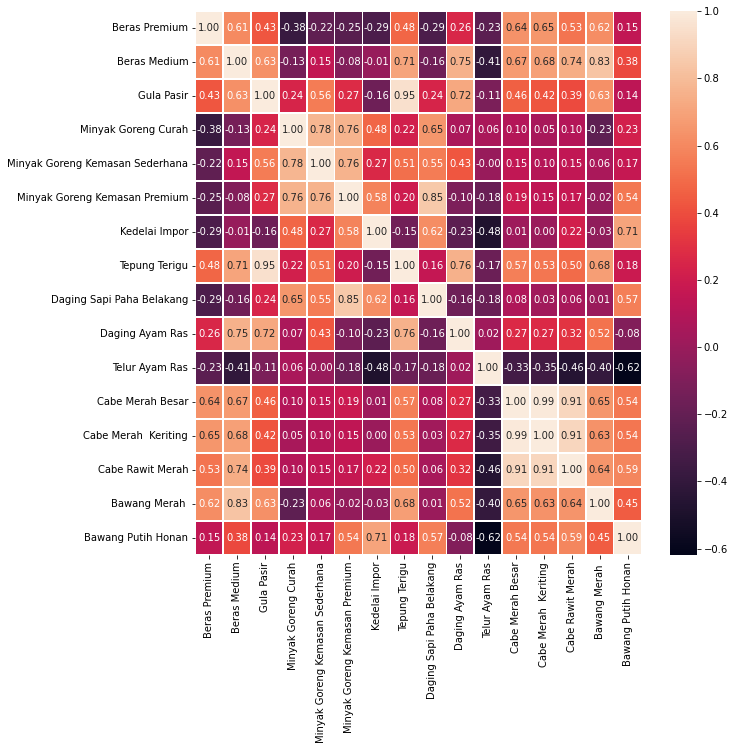

In [ ]:
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(data2.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)

insight ; `diatas 0.5 // korelasi kuat`
*   Harga variabel Beras Premium berkorelasi kuat setiap minggunya dengan Beras Medium,Cabe Merah Besar, Cabe Merah Keriting, Cabe Rawit Merah dan Bawang Merah. 
*   Harga variabel Beras Medium berkorelasi kuat setiap minggunya dengan Beras Premium, Gula Pasir,Tepung Terigu, Daging Ayam Ras, Cabe Merah Besar, Cabe Merah Keriting, Cabe Rawit Merah dan Bawang Merah.
*   Harga variabel Gula Pasir berkorelasi kuat setiap minggunya dengan Beras Medium, Minyak Goreng Kemasasan Sederhana, Tepung Terigu, Daging Ayam Ras, dan Bawang Merah.  
*   Harga variabel Minyak Goreng Curah berkorelasi kuat setiap minggunya dengan minyak goreng kemasan sederhana, minyak goreng kemasan premium dan daging sapi paha belakang.
*   Harga variabel Minyak Goreng Kemasan Sederhana berkorelasi kuat setiap minggunya dengan gula pasir, minyak goreng curah, minyak goreng kemasan premium, tepung terigu, dan daging sapi paha belakang.
*   Harga variabel Minyak Goreng Kemasan Premium berkorelasi kuat setiap minggunya dengan minyak goreng curah, minyak goreng kemasan sederhana, kedalai impor, daging sapi paha belakang dan bawang putih honan.
*   Harga variabel kedelai impor berkorelasi kuat setiap minggunya dengan minyak goreng kemasan premium, daging sapi paha belakang, dan bawang putih honan.
*   Harga variabel tepung terigu berkorelasi kuat setiap minggunya dengan beras medium, gula pasir, minyak goreng kemasan sederhana, daging ayam ras, cabe merah besar, cabe merah keriting, cabe rawit merah, dan bawang merah.
*   Harga variabel Daging Sapi Paha Belakang berkorelasi kuat setiap minggunya dengan minyak goreng curah, minyak goreng kemasan sederhana, minyak goreng kemasan premium, kedelai impor dan bawang putih honan.
*   Harga variabel daging ayam ras berkorelasi kuat setiap minggunya dengan beras medium, gula pasir, tepung terigu dan bawang merah.
*   Harga variabel Cabe Merah Besar berkorelasi kuat setiap minggunya dengan beras premium, beras medium, tepung terigu, cabe merah keriting, cabe rawit merah, bawang merah dan bawang putih honan.
*   Harga variabel Cabe Merah Keriting berkorelasi kuat setiap minggunya dengan beras premium, beras medium, tepung terigu, cabe merah keriting, cabe rawit merah, bawang merah dan bawang putih honan.
*   Harga variabel Cabe Rawit Merah berkorelasi kuat setiap minggunya dengan beras premium, beras medium, tepung terigu, cabe merah keriting, cabe rawit merah, bawang merah dan bawang putih honan.
*   Harga variabel Bawang Merah berkorelasi kuat setiap minggunya dengan beras premium, beras medium, tepung terigu, cabe merah keriting, cabe rawit merah, bawang merah dan bawang putih honan.
*   Harga variabel Bawang Putih Honan berkorelasi kuat setiap minggunya dengan minyak goreng kemasan premium, kedelai impor, daging sapi paha belakang, cabe merah besar, cabe merah keriting, dan cabe rawit merah

**data bulanan**

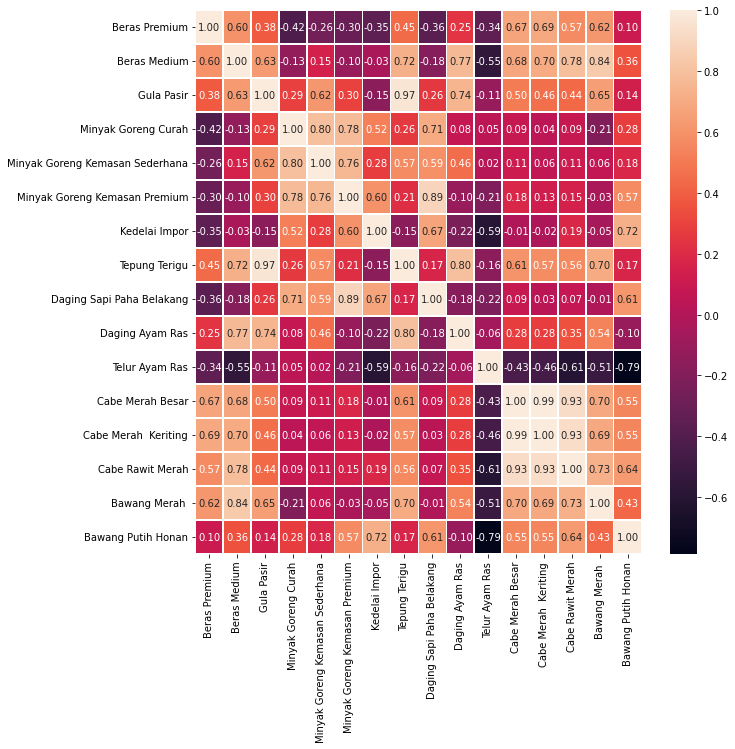

In [ ]:
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(data3.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)

insight ; `diatas 0.5 // korelasi kuat`
*   Harga variabel Beras Premium berkorelasi kuat setiap bulannya dengan Beras Medium,Cabe Merah Besar, Cabe Merah Keriting, Cabe Rawit Merah dan Bawang Merah. 
*   Harga variabel Beras Medium berkorelasi kuat setiap bulannya dengan Beras Premium, Gula Pasir,Tepung Terigu, Daging Ayam Ras, Cabe Merah Besar, Cabe Merah Keriting, Cabe Rawit Merah dan Bawang Merah.
*   Harga variabel Gula Pasir berkorelasi kuat setiap bulannya dengan Beras Medium, Minyak Goreng Kemasasan Sederhana, Tepung Terigu, Daging Ayam Ras, dan Bawang Merah.  
*   Harga variabel Minyak Goreng Curah berkorelasi kuat setiap bulannya dengan minyak goreng kemasan sederhana, minyak goreng kemasan premium dan daging sapi paha belakang.
*   Harga variabel Minyak Goreng Kemasan Sederhana berkorelasi kuat setiap bulannya dengan gula pasir, minyak goreng curah, minyak goreng kemasan premium, tepung terigu, dan daging sapi paha belakang.
*   Harga variabel Minyak Goreng Kemasan Premium berkorelasi kuat setiap bulannya dengan minyak goreng curah, minyak goreng kemasan sederhana, kedalai impor, daging sapi paha belakang dan bawang putih honan.
*   Harga variabel kedelai impor berkorelasi kuat setiap bulannya dengan minyak goreng kemasan premium, daging sapi paha belakang, dan bawang putih honan.
*   Harga variabel tepung terigu berkorelasi kuat setiap bulannya dengan beras medium, gula pasir, minyak goreng kemasan sederhana, daging ayam ras, cabe merah besar, cabe merah keriting, cabe rawit merah, dan bawang merah.
*   Harga variabel Daging Sapi Paha Belakang berkorelasi kuat setiap bulannya dengan minyak goreng curah, minyak goreng kemasan sederhana, minyak goreng kemasan premium, kedelai impor dan bawang putih honan.
*   Harga variabel daging ayam ras berkorelasi kuat setiap bulannya dengan beras medium, gula pasir, tepung terigu dan bawang merah.
*   Harga variabel Cabe Merah Besar berkorelasi kuat setiap bulannya dengan beras premium, beras medium, tepung terigu, cabe merah keriting, cabe rawit merah, bawang merah dan bawang putih honan.
*   Harga variabel Cabe Merah Keriting berkorelasi kuat setiap bulannya dengan beras premium, beras medium, tepung terigu, cabe merah keriting, cabe rawit merah, bawang merah dan bawang putih honan.
*   Harga variabel Cabe Rawit Merah berkorelasi kuat setiap bulannya dengan beras premium, beras medium, tepung terigu, cabe merah keriting, cabe rawit merah, bawang merah dan bawang putih honan.
*   Harga variabel Bawang Merah berkorelasi kuat setiap bulannya dengan beras premium, beras medium, tepung terigu, cabe merah keriting, cabe rawit merah, bawang merah dan bawang putih honan.
*   Harga variabel Bawang Putih Honan berkorelasi kuat setiap bulannya dengan minyak goreng kemasan premium, kedelai impor, daging sapi paha belakang, cabe merah besar, cabe merah keriting, dan cabe rawit merah

`cek stasioner`

In [ ]:
def test_stasioner(timeseries):
  stasioner = []
  nonstasioner = []
  for i in timeseries.columns:
    print("Hasil dickey fuller variabel {}".format(i))
    adft = adfuller(timeseries[i],autolag='AIC')
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    
    for key,values in adft[4].items():
        output['Nilai Kritis (%s)'%key] =  values
    print(output)
    print('')

    if output['p-value'] < 0.05:
      stasioner.append(i)
    else:
      nonstasioner.append(i)
  print('Stasioner = ',stasioner)
  print('Tidak Stasioner = ',nonstasioner)

#apply fungsi test_stasioner  
test_stasioner(df)

Hasil dickey fuller variabel Beras Premium
Test Statistics                 -2.914334
p-value                          0.043706
No. of lags used                 9.000000
Number of observations used    798.000000
Nilai Kritis (1%)               -3.438571
Nilai Kritis (5%)               -2.865169
Nilai Kritis (10%)              -2.568702
dtype: float64

Hasil dickey fuller variabel Beras Medium
Test Statistics                 -1.580936
p-value                          0.493163
No. of lags used                 3.000000
Number of observations used    804.000000
Nilai Kritis (1%)               -3.438510
Nilai Kritis (5%)               -2.865142
Nilai Kritis (10%)              -2.568688
dtype: float64

Hasil dickey fuller variabel Gula Pasir
Test Statistics                 -1.623331
p-value                          0.470983
No. of lags used                 9.000000
Number of observations used    798.000000
Nilai Kritis (1%)               -3.438571
Nilai Kritis (5%)               -2.865169
Nil

NB : *terbukti rata-rata variabel data memiliki tren / tidak stasioner*

`maka Model ARMA, ARIMA, SARIMA tidak direkomendasikan`

Maka akan dilihat `pola trend, musiman bahan pokok dari data`

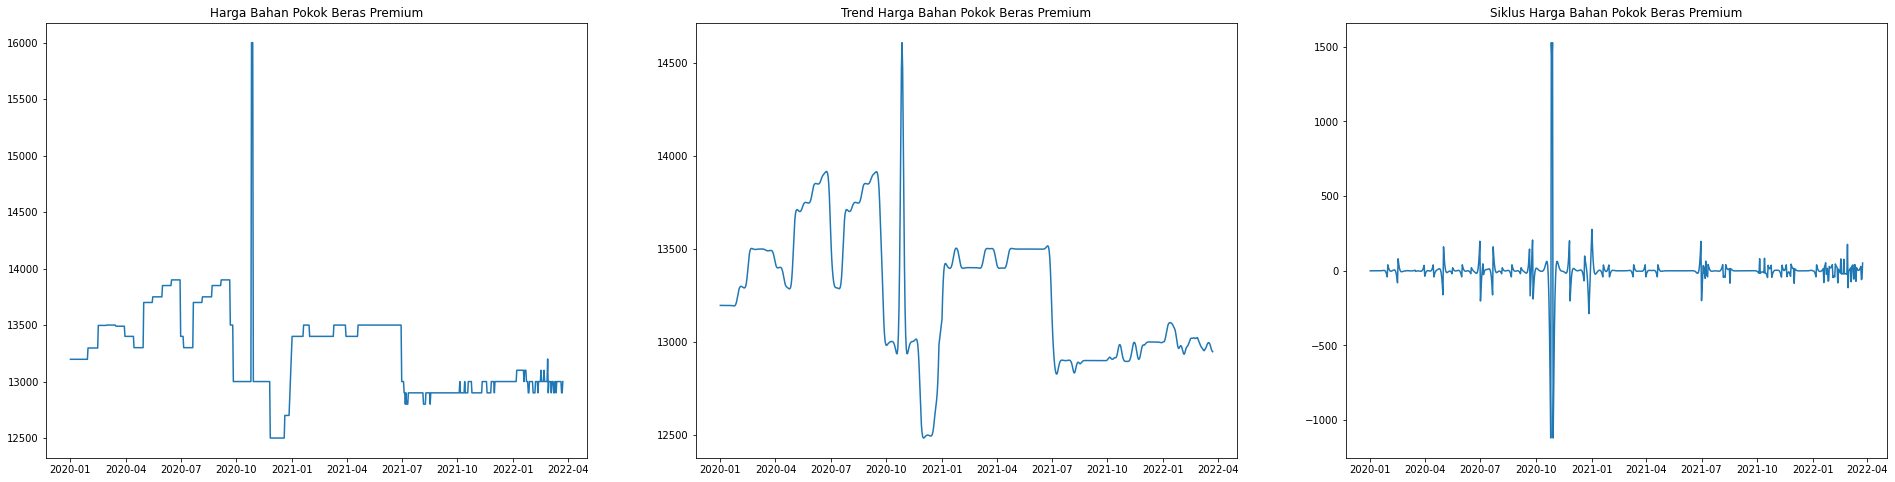

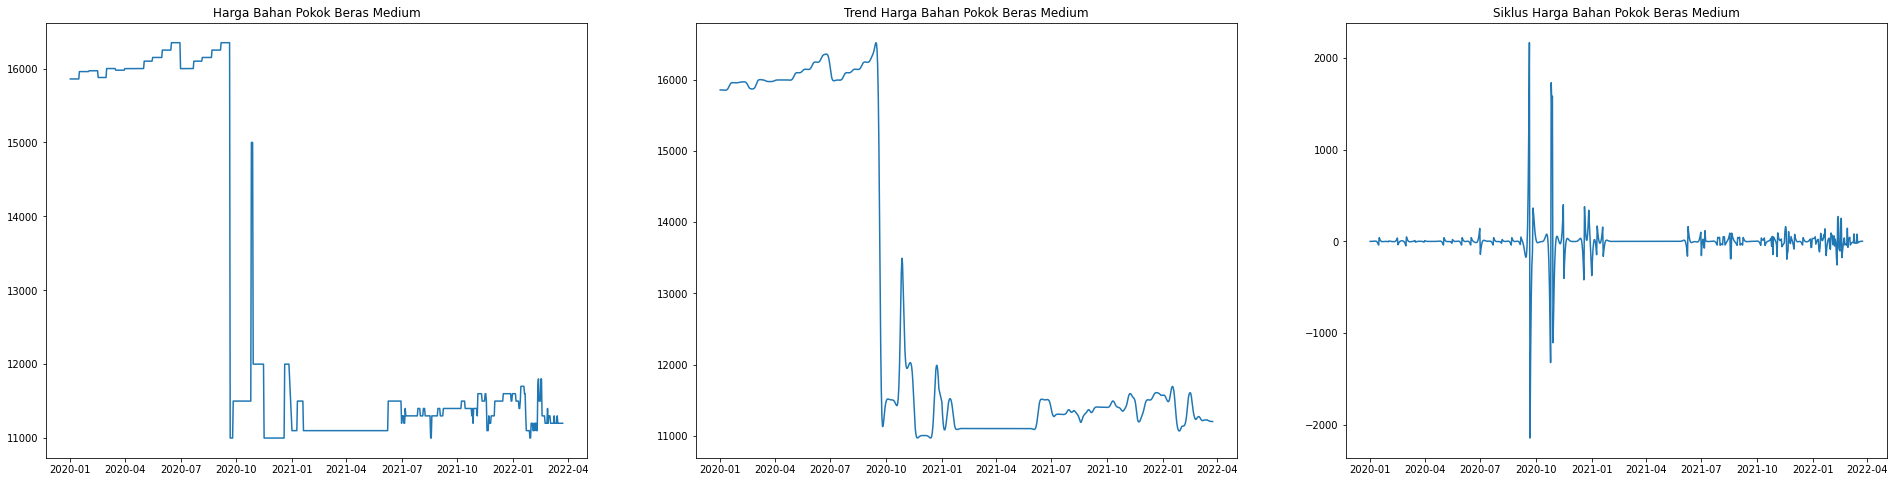

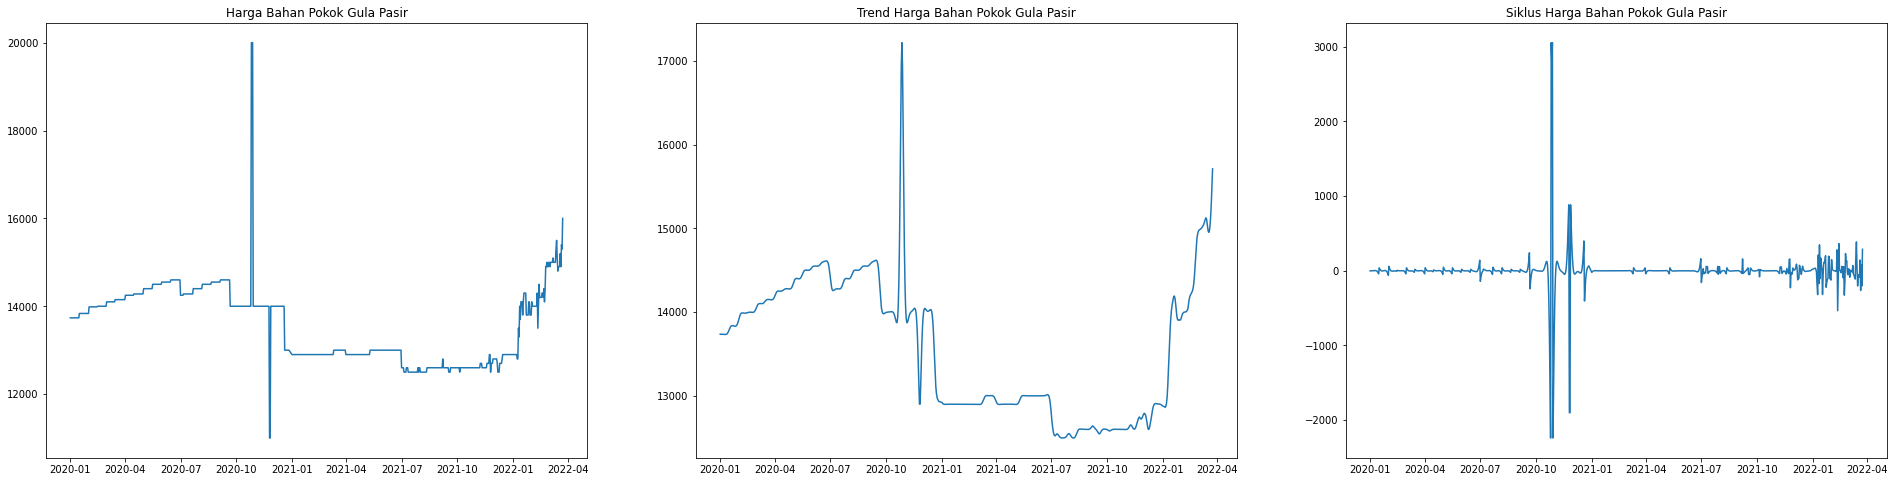

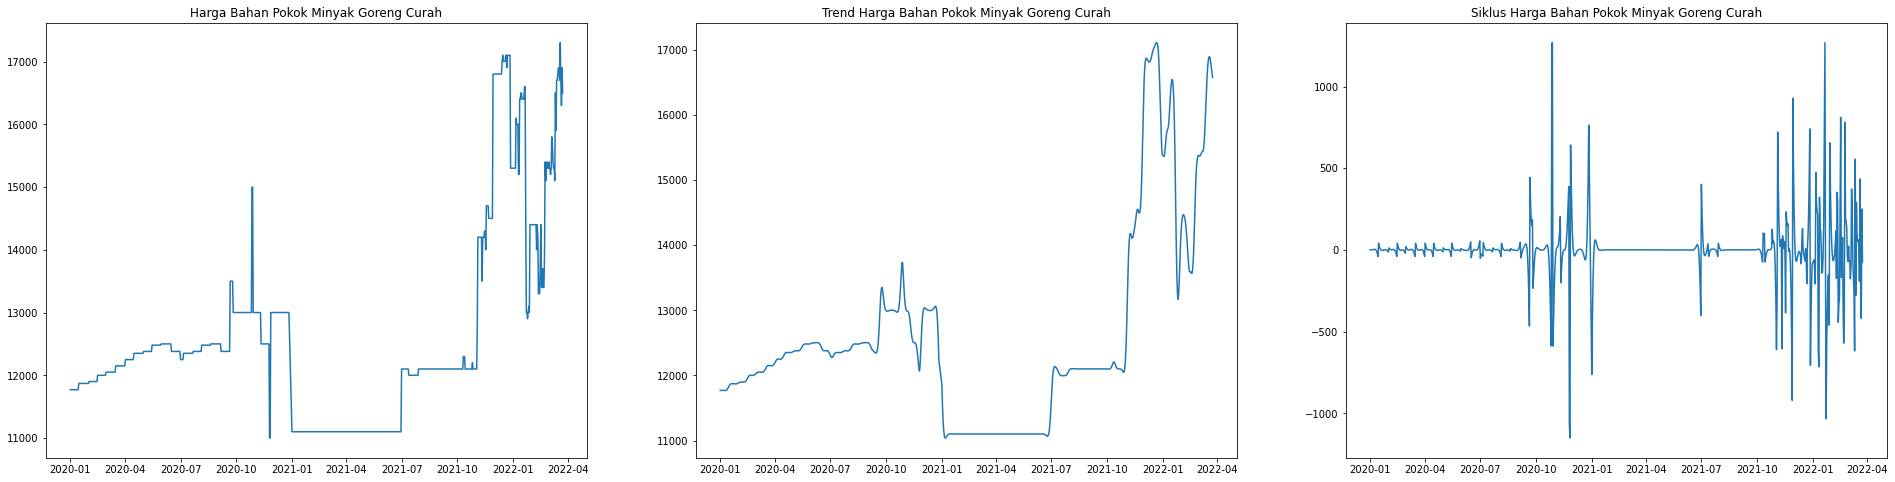

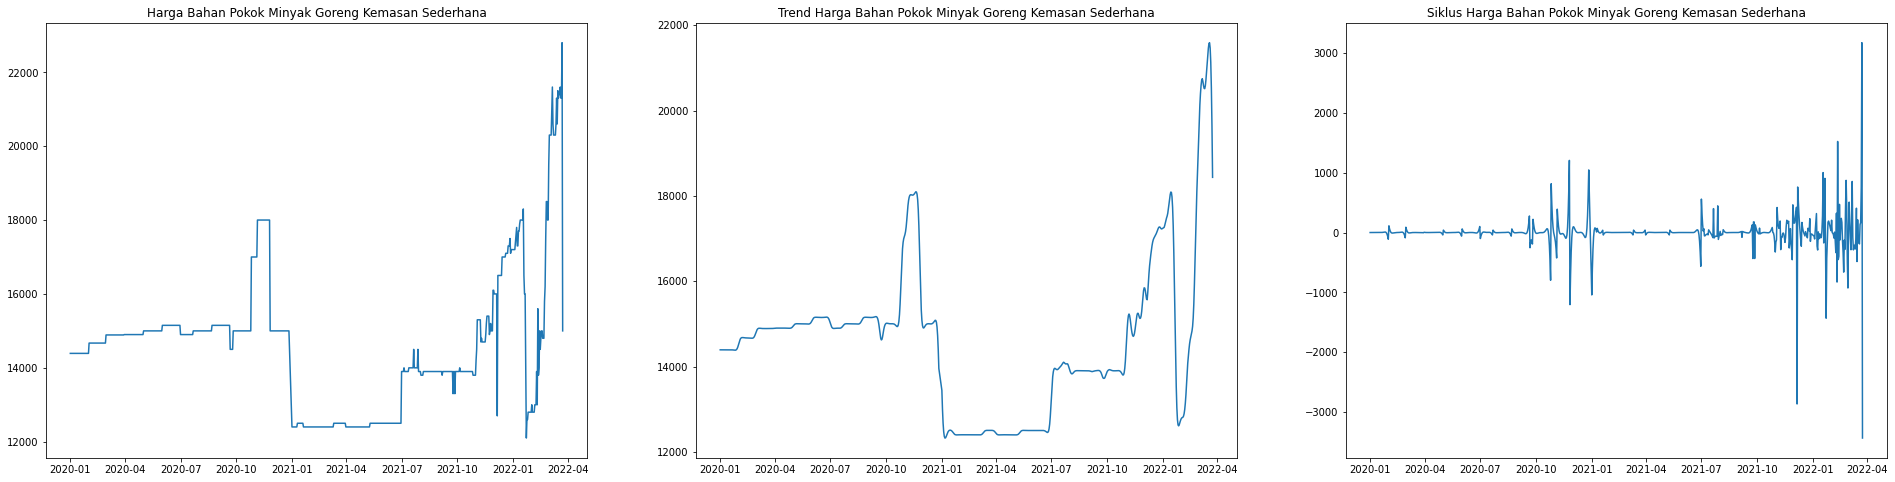

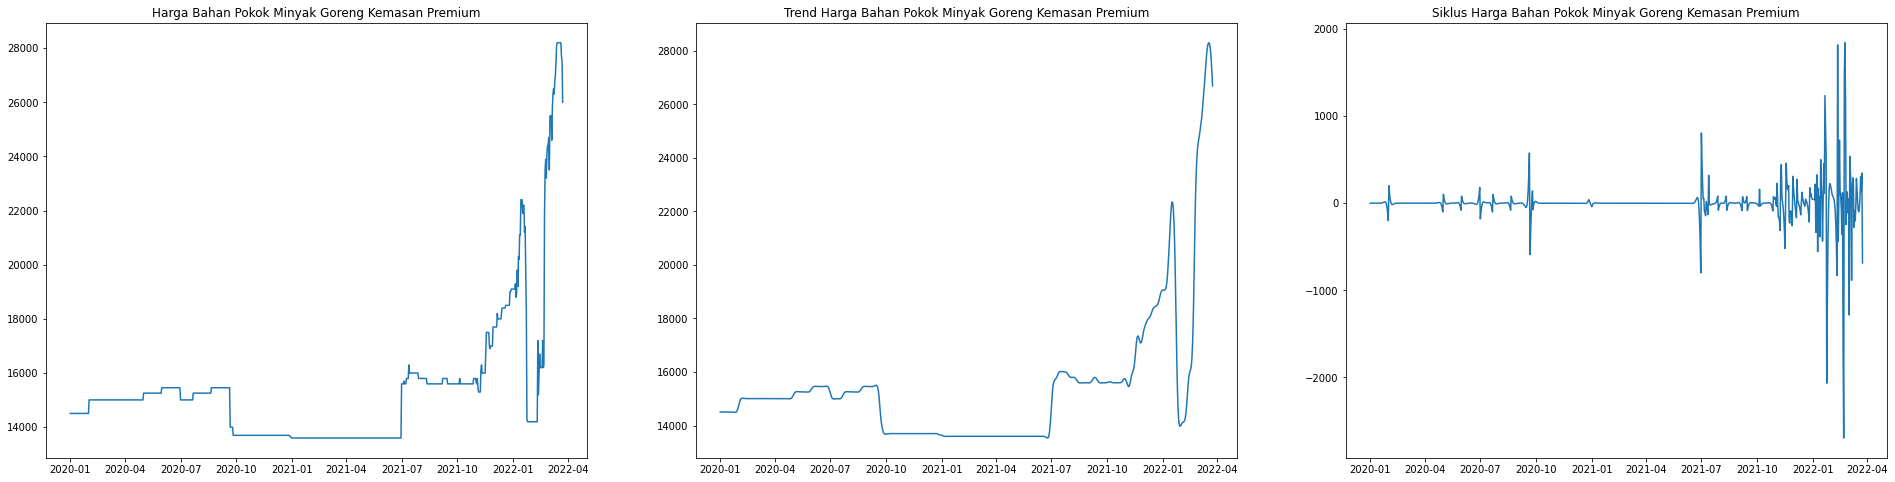

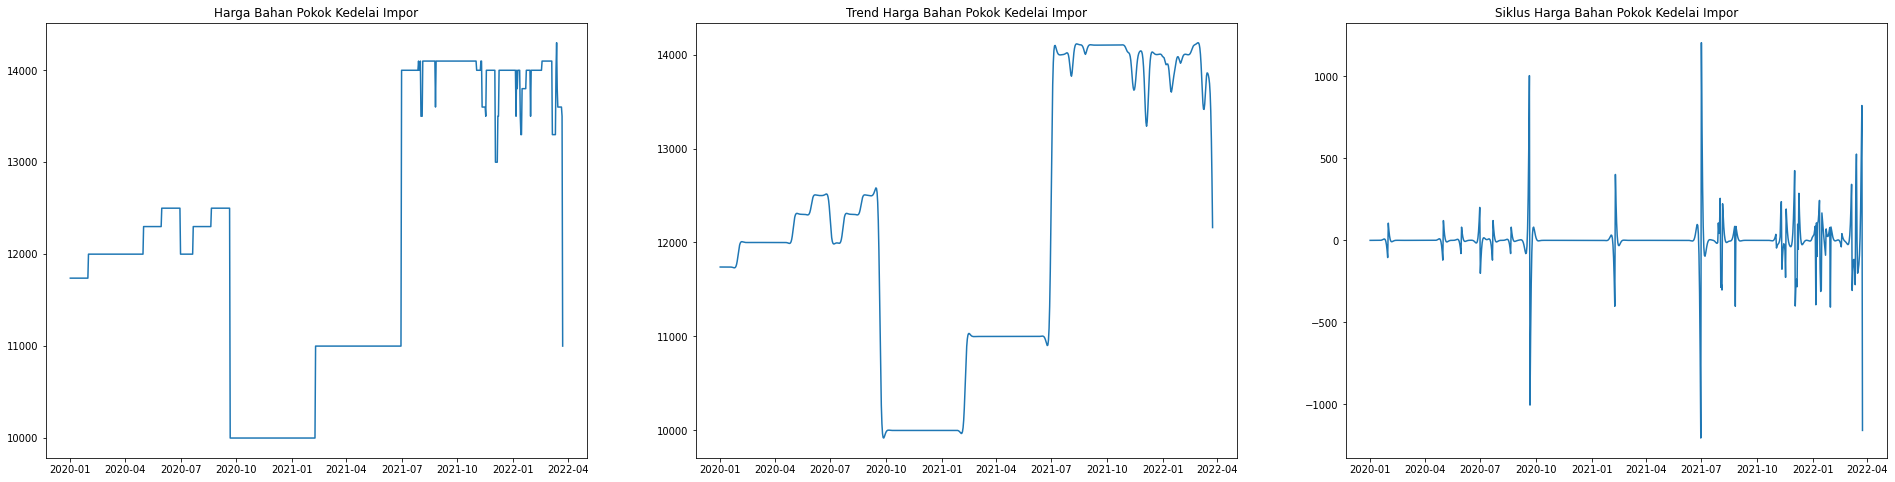

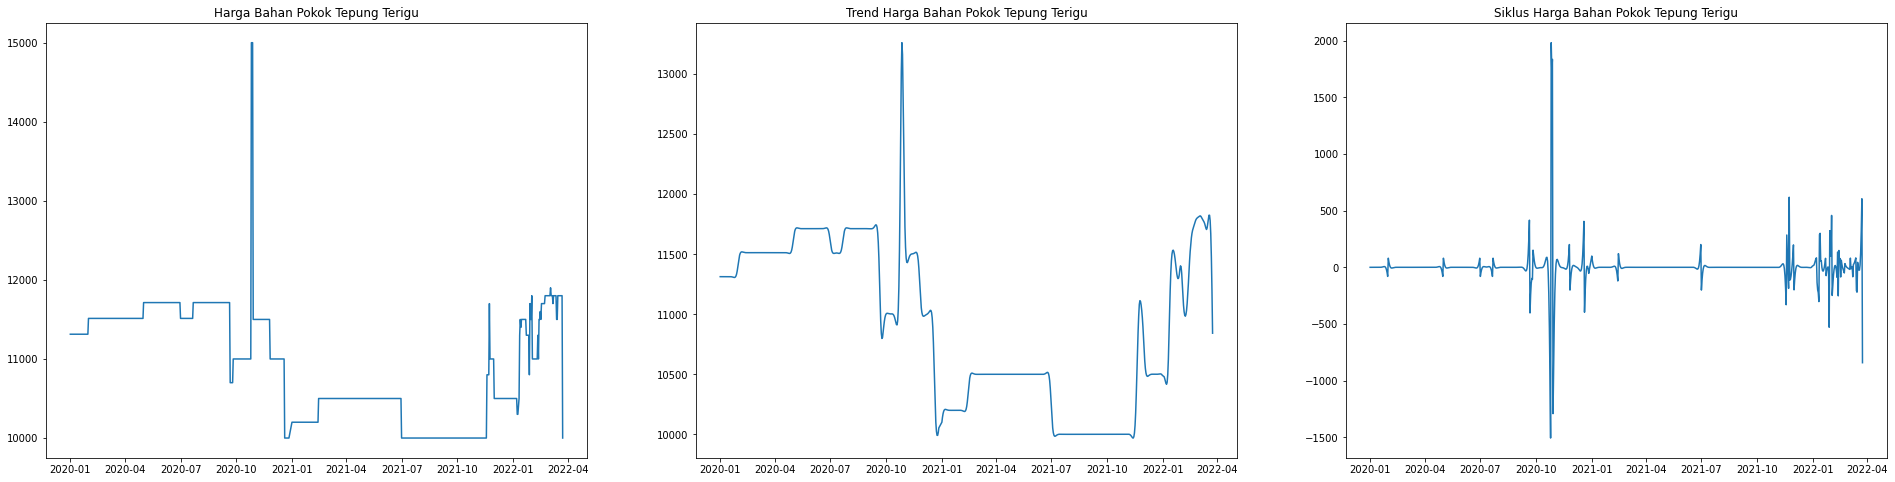

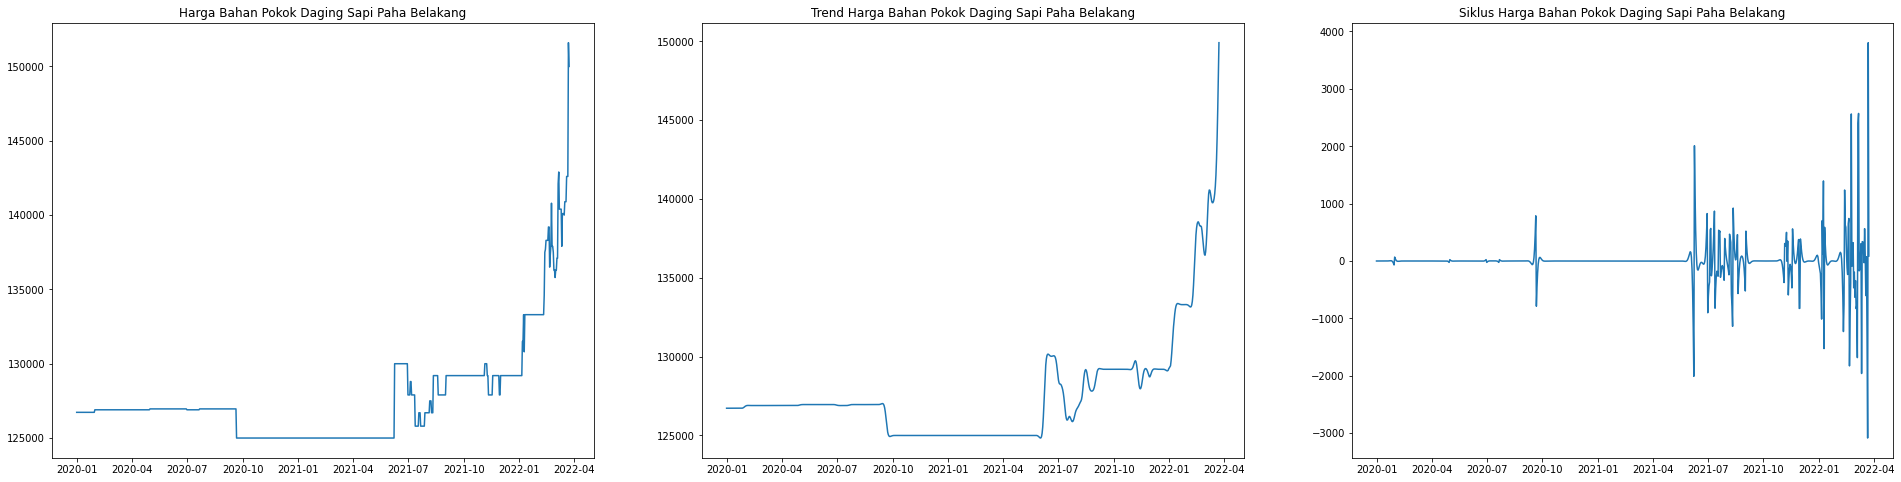

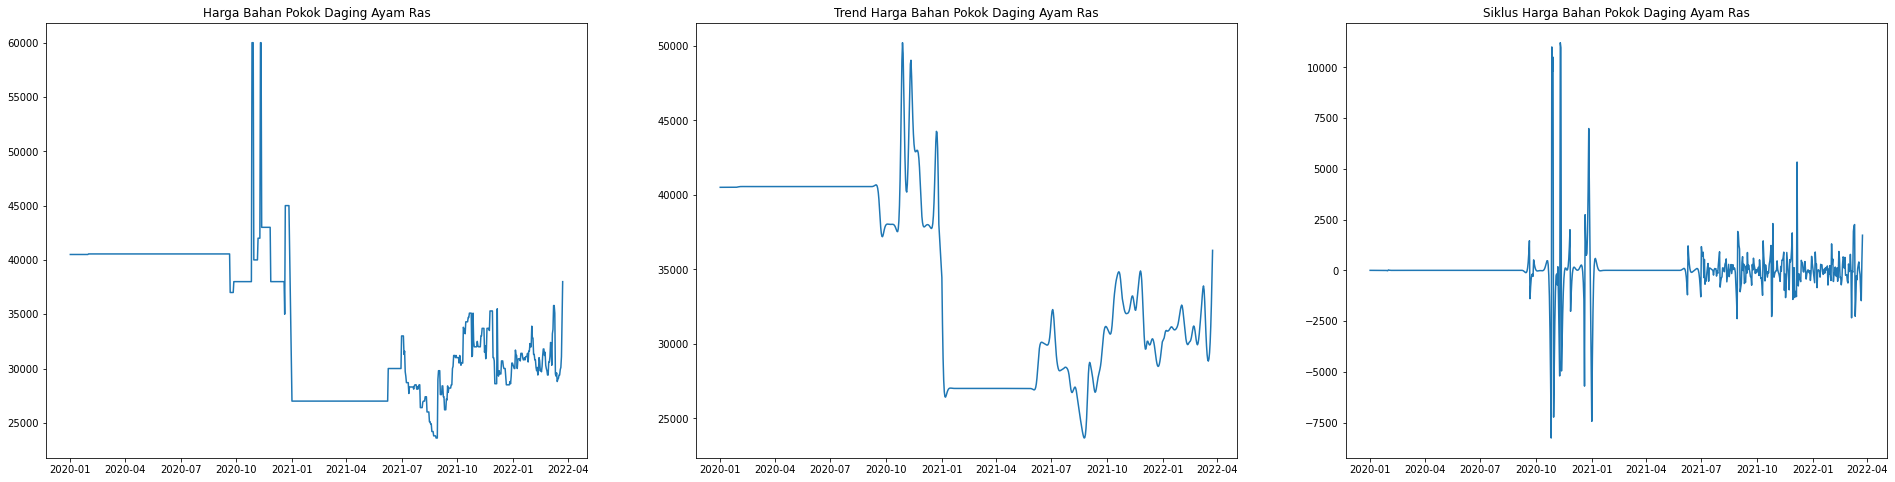

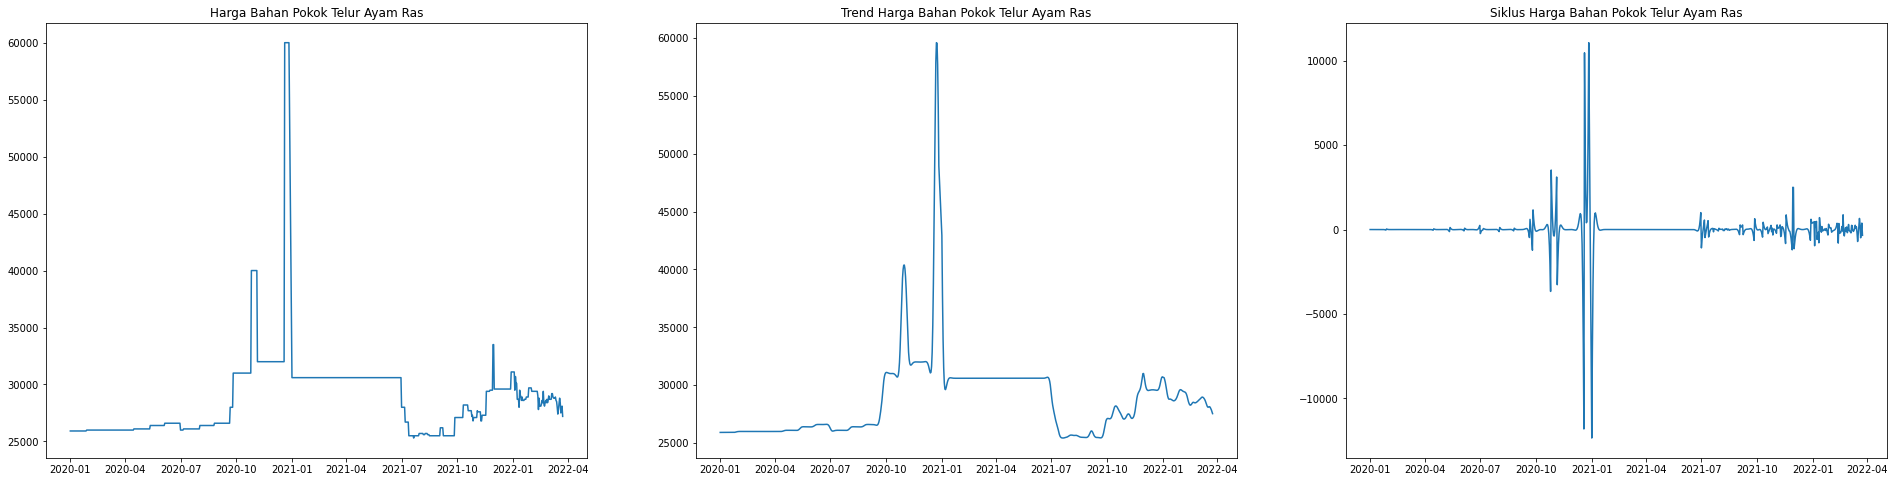

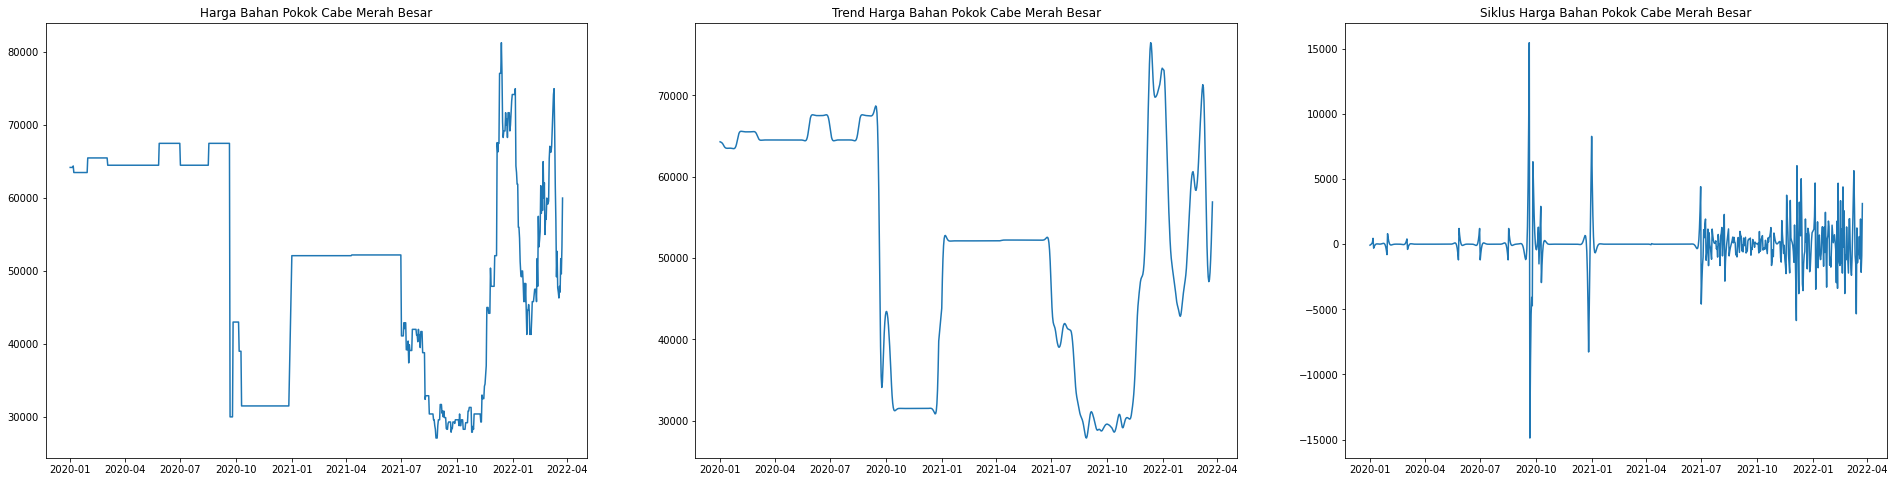

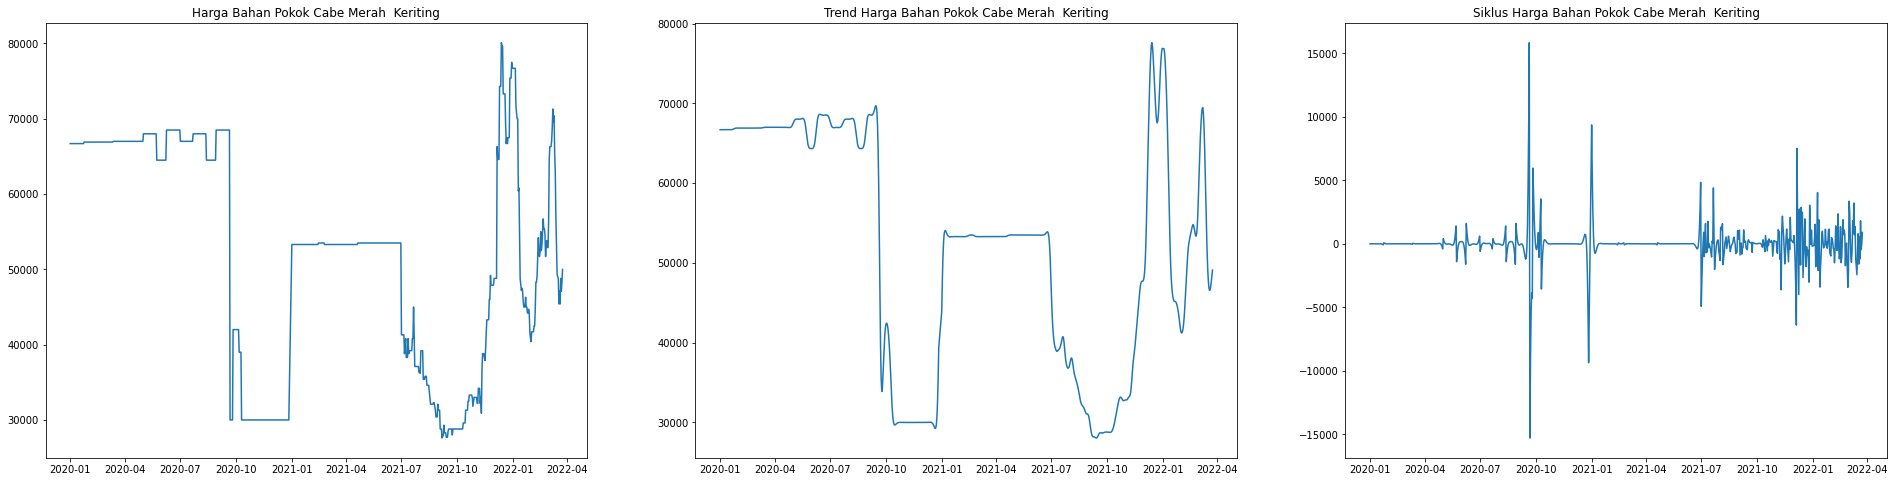

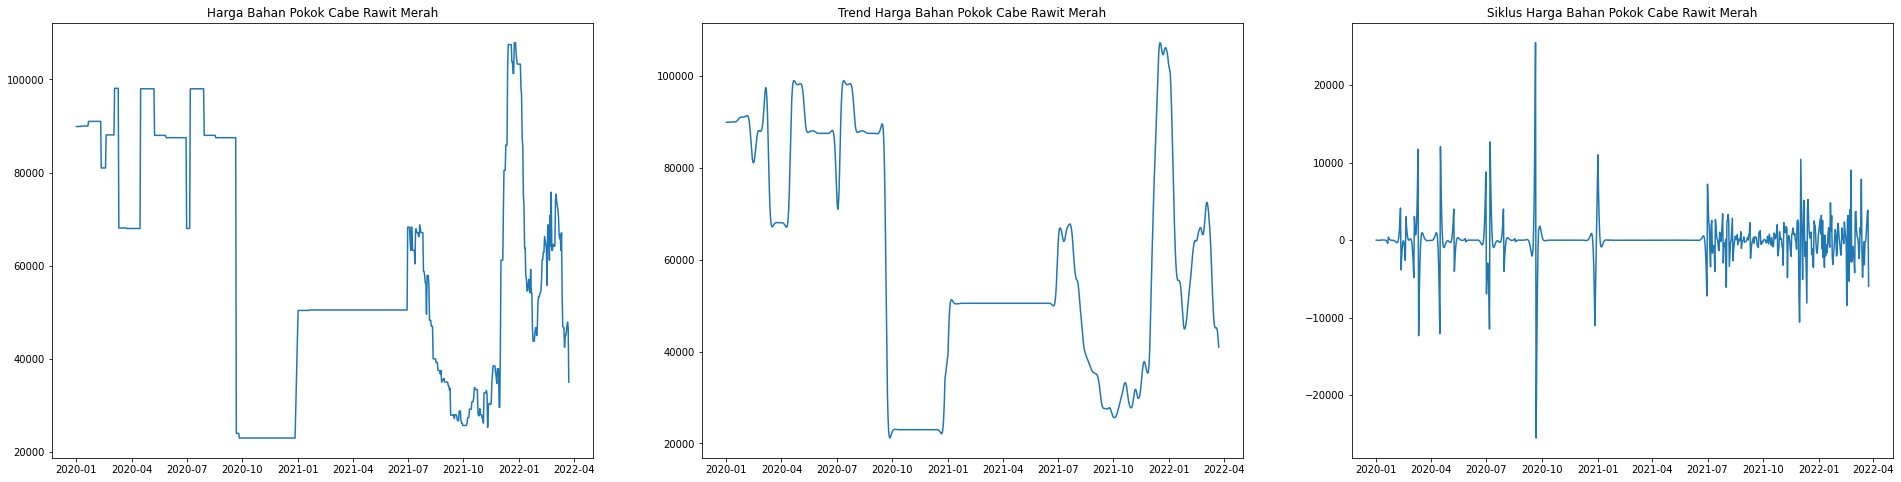

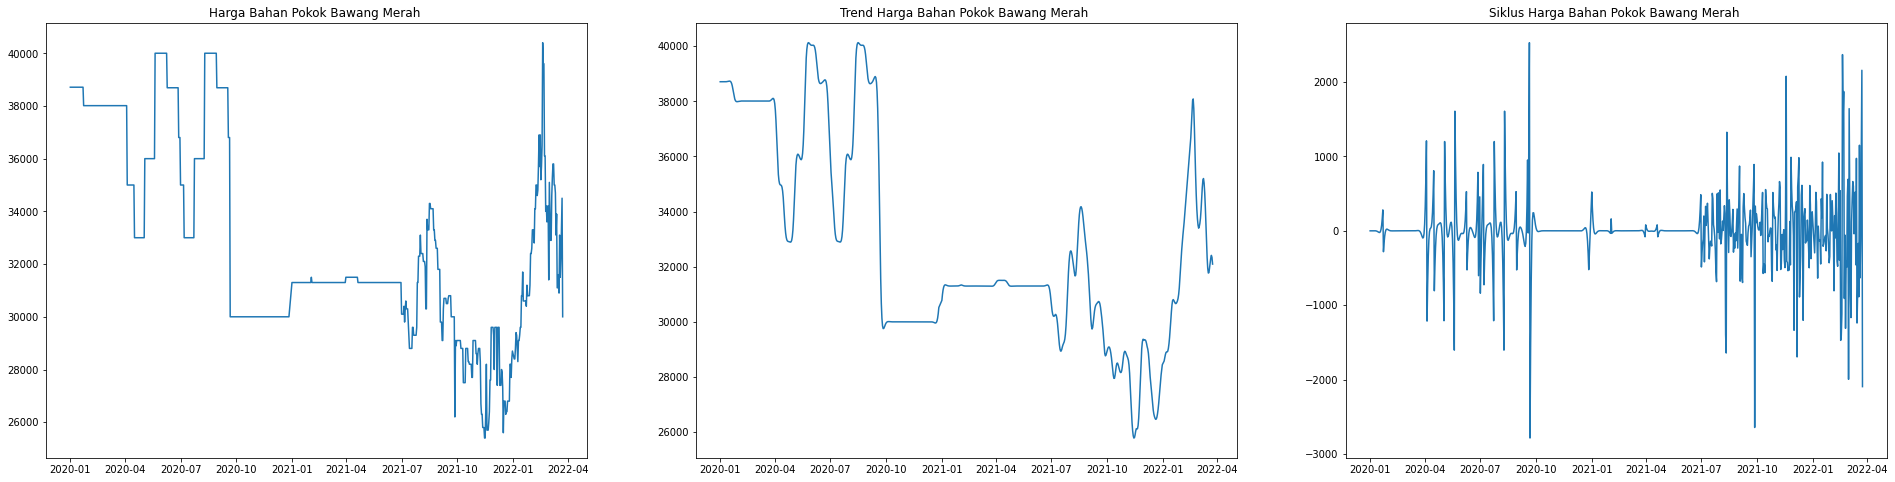

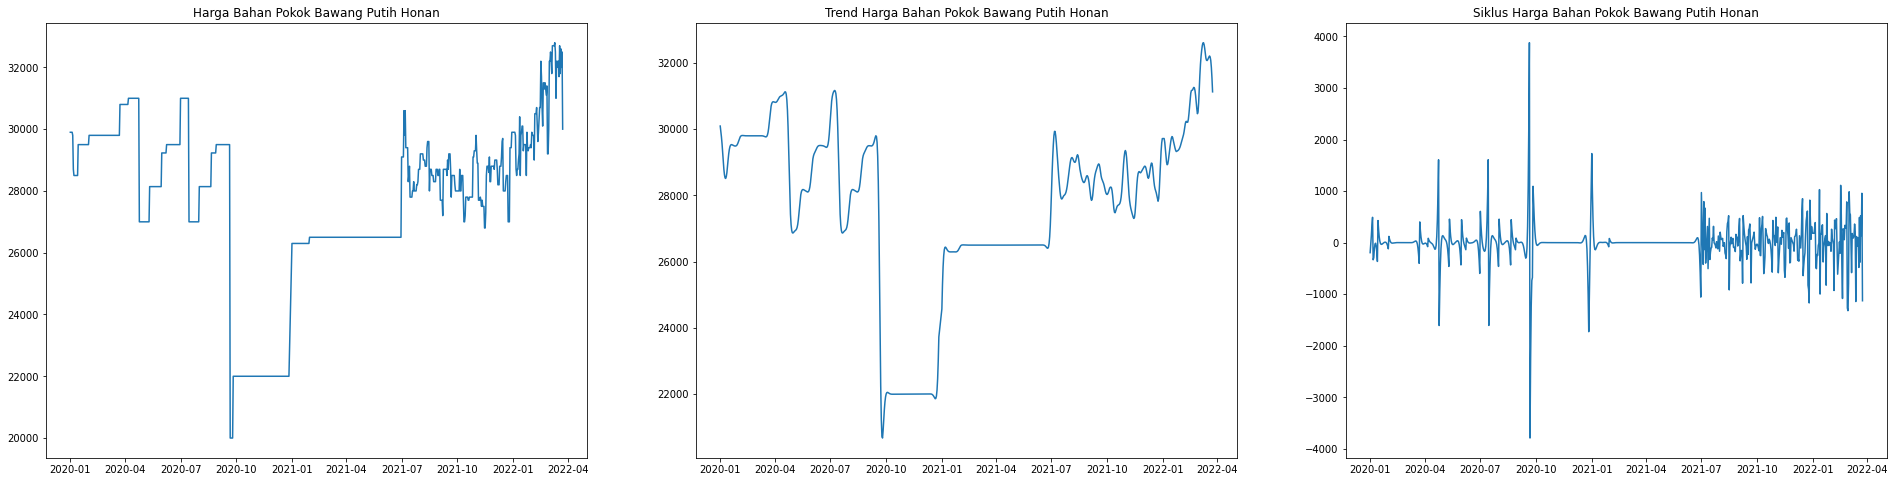

In [ ]:
for i in df.columns:
  dataset = df[i]
  cycle, trend = sm.tsa.filters.hpfilter(dataset, 12)
  fig, ax = plt.subplots(1,3,figsize=(33,8))
  ax[0].plot(dataset)
  ax[0].set_title('Harga Bahan Pokok {}'.format(i))
  ax[1].plot(trend)
  ax[1].set_title('Trend Harga Bahan Pokok {}'.format(i))
  ax[2].plot(cycle)
  ax[2].set_title('Siklus Harga Bahan Pokok {}'.format(i))
  print('\n \n')
  plt.show()

#Data Preprocessing

`Train Test Split`

In [ ]:
train_data, test_data = df[0 : int(len(df) * 0.8)], df[int(len(df) * 0.8) :]

In [ ]:
print('bentuk data train = ',train_data.shape)
print('bentuk data test = ',test_data.shape)

bentuk data train =  (646, 16)
bentuk data test =  (162, 16)


#Model ETS

`asumsi : `

Pola Musiman - Ya (multiplicative)

Pola Trend - Ya (multiplicative)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dis

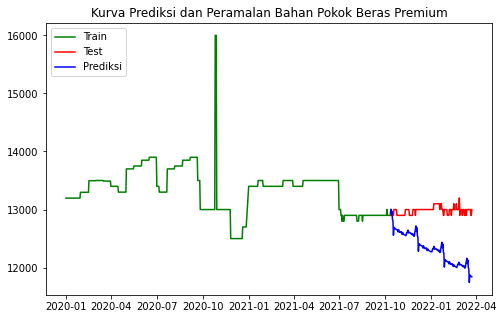

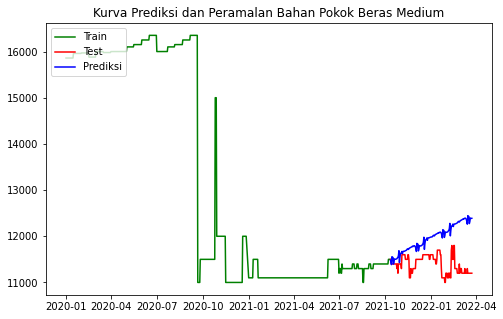

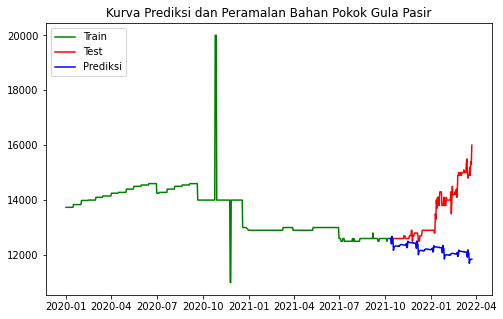

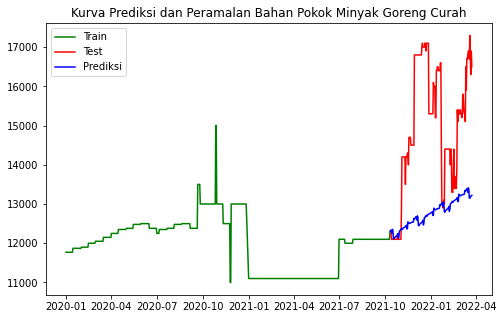

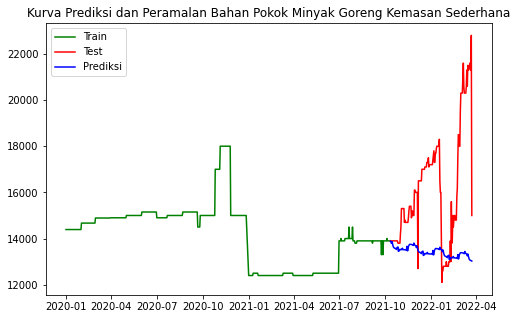

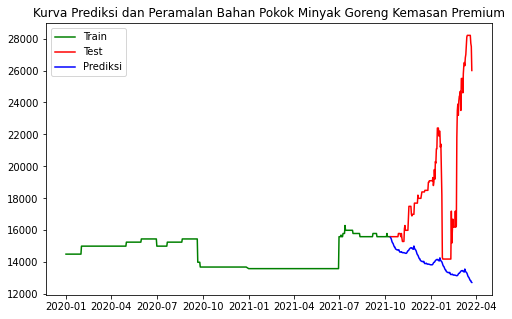

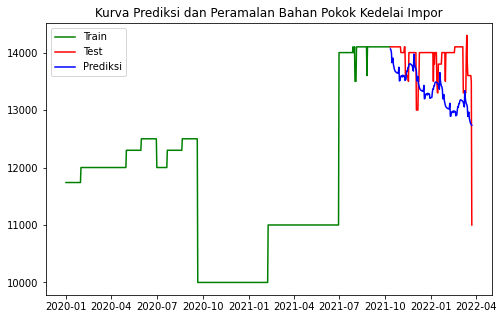

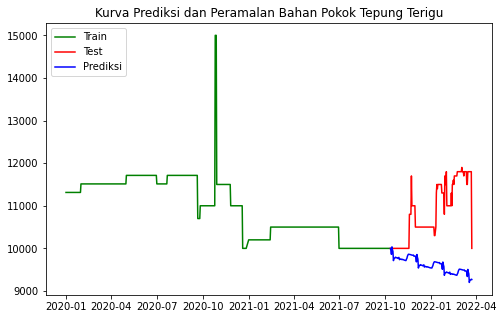

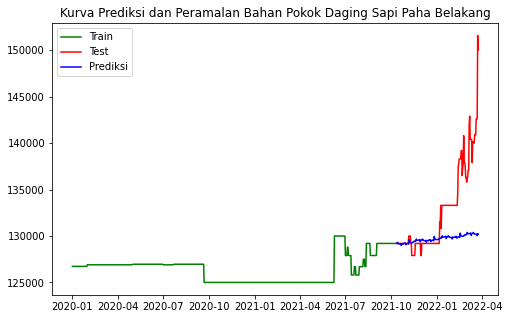

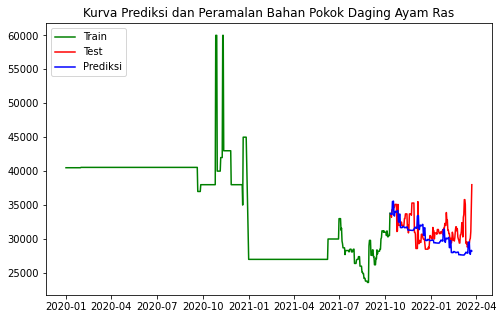

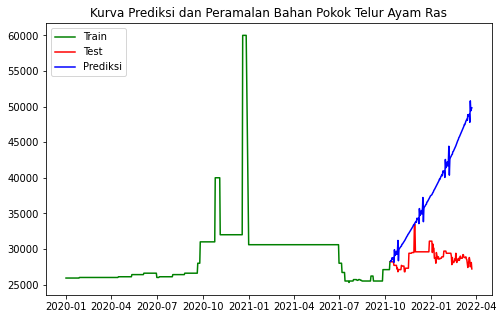

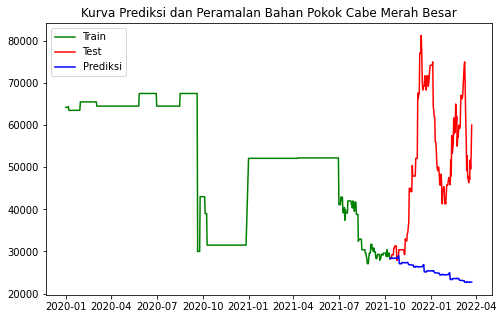

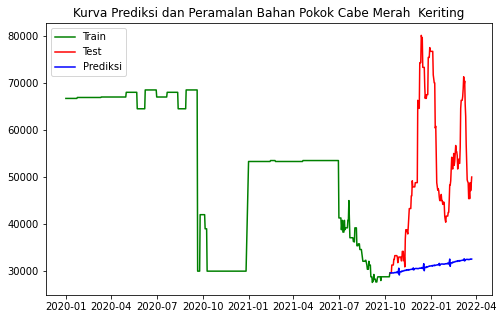

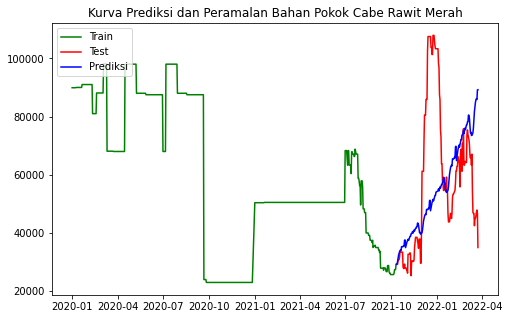

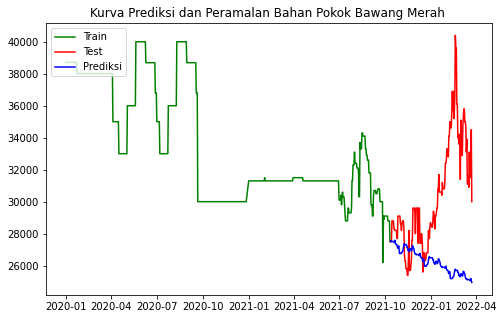

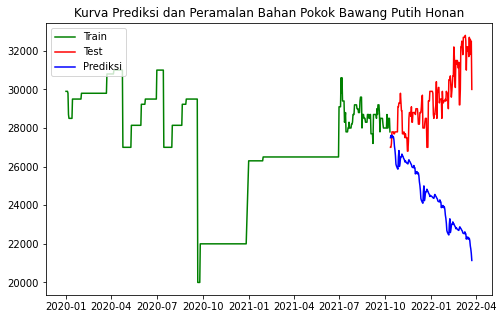

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error

col = train_data.columns
RMSE = []
MAE = []
for i in col:
  hwmodel = ExponentialSmoothing(train_data[i],trend='mul', seasonal='mul', seasonal_periods=50).fit()
  test_pred= hwmodel.forecast(test_data.shape[0])
  RMSE.append(np.sqrt(mean_squared_error(test_data[i], test_pred)))
  MAE.append(mean_absolute_error(test_data[i], test_pred))

  plt.figure(figsize=(8, 5))
  plt.plot(train_data.index, train_data[i], color='g', label='Train')
  plt.plot(test_data.index, test_data[i], color='r', label='Test')
  plt.plot(test_data.index, test_pred, color='b', label='Prediksi')
  plt.legend(loc="upper left")
  plt.title("Kurva Prediksi dan Peramalan Bahan Pokok {}".format(i))

`evaluasi model ETS`

In [ ]:
ETS = pd.DataFrame(list(zip(col, RMSE, MAE)),columns =['Jenis Bahan Pokok', 'RMSE', 'MAE'])
print(ETS)
print('\nrata-rata RMSE = ',ETS['RMSE'].mean())
print('rata-rata MAE = ',ETS['MAE'].mean())

                  Jenis Bahan Pokok          RMSE           MAE
0                     Beras Premium    711.293415    651.759569
1                      Beras Medium    687.463101    569.993463
2                        Gula Pasir   1676.523566   1289.760643
3               Minyak Goreng Curah   2627.984038   2183.148313
4   Minyak Goreng Kemasan Sederhana   3722.211978   2836.767968
5     Minyak Goreng Kemasan Premium   6530.607812   4784.398930
6                     Kedelai Impor    674.042527    584.445282
7                     Tepung Terigu   1492.449520   1259.345233
8         Daging Sapi Paha Belakang   5293.771206   3359.201187
9                   Daging Ayam Ras   2490.903429   1918.428052
10                   Telur Ayam Ras  11161.469137   9238.517249
11                 Cabe Merah Besar  30257.636526  25796.716320
12             Cabe Merah  Keriting  24326.977255  20057.342457
13                 Cabe Rawit Merah  24899.868327  17315.751544
14                    Bawang Merah    56

#Model LSTM

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, LSTM

In [ ]:
#deskripsi bentuk data train,test
def ekstrak_window_data(dataset, window_len=5, zero_base=True):
    window_data = []
    for i in range(len(dataset) - window_len):
        tmp = dataset[i: (i + window_len)].copy()
        window_data.append(tmp.values)
    return np.array(window_data)

#membentuk data baru kriteria LSTM
def prepare_data(dataset, aim, window_len=10, zero_base=True, test_size=0.2):
    X_train = ekstrak_window_data(train_data, window_len, zero_base)
    X_test = ekstrak_window_data(test_data, window_len, zero_base)
    y_train = train_data[aim][window_len:].values
    y_test = test_data[aim][window_len:].values
    if zero_base:
        y_train = y_train / train_data[aim][:-window_len].values - 1
        y_test = y_test / test_data[aim][:-window_len].values - 1
    return train_data, test_data, X_train, X_test, y_train, y_test

#membangun model LSTM
def model_lstm(input_data, output_size, neurons, activ_func='linear', dropout=0.2, loss='mse', optimizer='adam'):
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(input_data.shape[1], input_data.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))
    model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
    return model

`data (df) tanpa scalling`

Epoch 1/100
20/20 [==============================] - 3s 39ms/step - loss: 0.7638 - accuracy: 0.1509 - val_loss: 0.3168 - val_accuracy: 0.3750
Epoch 2/100
20/20 [==============================] - 0s 9ms/step - loss: 0.4057 - accuracy: 0.2925 - val_loss: 0.1090 - val_accuracy: 0.5263
Epoch 3/100
20/20 [==============================] - 0s 10ms/step - loss: 0.2631 - accuracy: 0.3884 - val_loss: 0.0313 - val_accuracy: 0.5592
Epoch 4/100
20/20 [==============================] - 0s 11ms/step - loss: 0.1874 - accuracy: 0.4560 - val_loss: 0.0142 - val_accuracy: 0.5592
Epoch 5/100
20/20 [==============================] - 0s 10ms/step - loss: 0.1623 - accuracy: 0.5016 - val_loss: 0.0147 - val_accuracy: 0.5592
Epoch 6/100
20/20 [==============================] - 0s 10ms/step - loss: 0.1464 - accuracy: 0.5079 - val_loss: 0.0150 - val_accuracy: 0.5592
Epoch 7/100
20/20 [==============================] - 0s 10ms/step - loss: 0.1479 - accuracy: 0.5047 - val_loss: 0.0153 - val_accuracy: 0.5592
Epoch 8

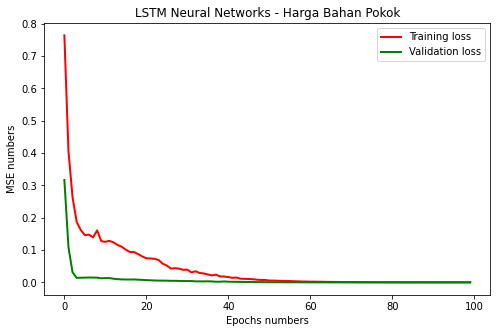

Epoch 1/100
20/20 [==============================] - 3s 37ms/step - loss: 0.2692 - accuracy: 0.3742 - val_loss: 0.1526 - val_accuracy: 0.2697
Epoch 2/100
20/20 [==============================] - 0s 9ms/step - loss: 0.1990 - accuracy: 0.4292 - val_loss: 0.1254 - val_accuracy: 0.2697
Epoch 3/100
20/20 [==============================] - 0s 10ms/step - loss: 0.1740 - accuracy: 0.5047 - val_loss: 0.1045 - val_accuracy: 0.2697
Epoch 4/100
20/20 [==============================] - 0s 9ms/step - loss: 0.1397 - accuracy: 0.4921 - val_loss: 0.0844 - val_accuracy: 0.2697
Epoch 5/100
20/20 [==============================] - 0s 9ms/step - loss: 0.1263 - accuracy: 0.5063 - val_loss: 0.0695 - val_accuracy: 0.2697
Epoch 6/100
20/20 [==============================] - 0s 10ms/step - loss: 0.1071 - accuracy: 0.5110 - val_loss: 0.0544 - val_accuracy: 0.2697
Epoch 7/100
20/20 [==============================] - 0s 9ms/step - loss: 0.0873 - accuracy: 0.5094 - val_loss: 0.0447 - val_accuracy: 0.2697
Epoch 8/10

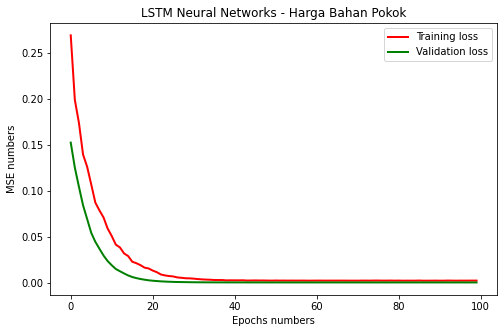

Epoch 1/100
20/20 [==============================] - 4s 44ms/step - loss: 0.0959 - accuracy: 0.5472 - val_loss: 0.0104 - val_accuracy: 0.2961
Epoch 2/100
20/20 [==============================] - 0s 10ms/step - loss: 0.0892 - accuracy: 0.5362 - val_loss: 0.0064 - val_accuracy: 0.2961
Epoch 3/100
20/20 [==============================] - 0s 10ms/step - loss: 0.0782 - accuracy: 0.5440 - val_loss: 0.0061 - val_accuracy: 0.2961
Epoch 4/100
20/20 [==============================] - 0s 10ms/step - loss: 0.0620 - accuracy: 0.5645 - val_loss: 0.0053 - val_accuracy: 0.2961
Epoch 5/100
20/20 [==============================] - 0s 10ms/step - loss: 0.0611 - accuracy: 0.5566 - val_loss: 0.0058 - val_accuracy: 0.2961
Epoch 6/100
20/20 [==============================] - 0s 11ms/step - loss: 0.0474 - accuracy: 0.5676 - val_loss: 0.0049 - val_accuracy: 0.2961
Epoch 7/100
20/20 [==============================] - 0s 10ms/step - loss: 0.0466 - accuracy: 0.5676 - val_loss: 0.0045 - val_accuracy: 0.2961
Epoch 

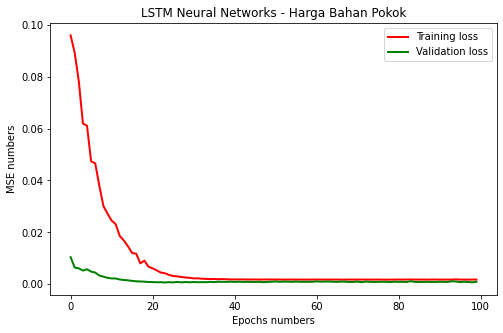

Epoch 1/100
20/20 [==============================] - 3s 38ms/step - loss: 0.4058 - accuracy: 0.5393 - val_loss: 0.0961 - val_accuracy: 0.1118
Epoch 2/100
20/20 [==============================] - 0s 10ms/step - loss: 0.2926 - accuracy: 0.4780 - val_loss: 0.1255 - val_accuracy: 0.1184
Epoch 3/100
20/20 [==============================] - 0s 9ms/step - loss: 0.2620 - accuracy: 0.5142 - val_loss: 0.1153 - val_accuracy: 0.1184
Epoch 4/100
20/20 [==============================] - 0s 10ms/step - loss: 0.1995 - accuracy: 0.5362 - val_loss: 0.0940 - val_accuracy: 0.1118
Epoch 5/100
20/20 [==============================] - 0s 9ms/step - loss: 0.1697 - accuracy: 0.5204 - val_loss: 0.0811 - val_accuracy: 0.1184
Epoch 6/100
20/20 [==============================] - 0s 11ms/step - loss: 0.1602 - accuracy: 0.5267 - val_loss: 0.0700 - val_accuracy: 0.1184
Epoch 7/100
20/20 [==============================] - 0s 11ms/step - loss: 0.1378 - accuracy: 0.5377 - val_loss: 0.0622 - val_accuracy: 0.1184
Epoch 8/

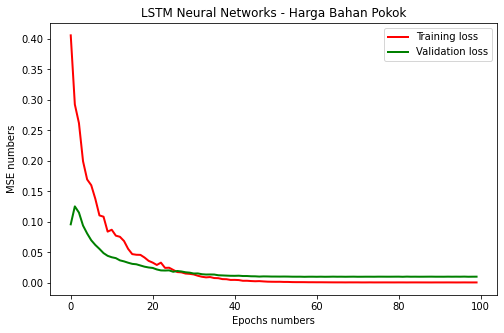

Epoch 1/100
20/20 [==============================] - 3s 40ms/step - loss: 0.2570 - accuracy: 0.6289 - val_loss: 0.0898 - val_accuracy: 0.0461
Epoch 2/100
20/20 [==============================] - 0s 10ms/step - loss: 0.1815 - accuracy: 0.5959 - val_loss: 0.0608 - val_accuracy: 0.0461
Epoch 3/100
20/20 [==============================] - 0s 11ms/step - loss: 0.1819 - accuracy: 0.5456 - val_loss: 0.0473 - val_accuracy: 0.0461
Epoch 4/100
20/20 [==============================] - 0s 10ms/step - loss: 0.1710 - accuracy: 0.5849 - val_loss: 0.0443 - val_accuracy: 0.0461
Epoch 5/100
20/20 [==============================] - 0s 10ms/step - loss: 0.1484 - accuracy: 0.5865 - val_loss: 0.0425 - val_accuracy: 0.0461
Epoch 6/100
20/20 [==============================] - 0s 10ms/step - loss: 0.1354 - accuracy: 0.5865 - val_loss: 0.0424 - val_accuracy: 0.0461
Epoch 7/100
20/20 [==============================] - 0s 10ms/step - loss: 0.1275 - accuracy: 0.6069 - val_loss: 0.0397 - val_accuracy: 0.0461
Epoch 

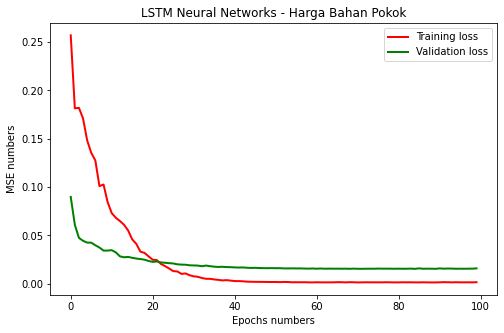

Epoch 1/100
20/20 [==============================] - 3s 38ms/step - loss: 0.1236 - accuracy: 0.7642 - val_loss: 0.0334 - val_accuracy: 0.0987
Epoch 2/100
20/20 [==============================] - 0s 11ms/step - loss: 0.0552 - accuracy: 0.7594 - val_loss: 0.0272 - val_accuracy: 0.0987
Epoch 3/100
20/20 [==============================] - 0s 10ms/step - loss: 0.0518 - accuracy: 0.7626 - val_loss: 0.0370 - val_accuracy: 0.0987
Epoch 4/100
20/20 [==============================] - 0s 10ms/step - loss: 0.0454 - accuracy: 0.7642 - val_loss: 0.0326 - val_accuracy: 0.0987
Epoch 5/100
20/20 [==============================] - 0s 10ms/step - loss: 0.0413 - accuracy: 0.7689 - val_loss: 0.0305 - val_accuracy: 0.0987
Epoch 6/100
20/20 [==============================] - 0s 10ms/step - loss: 0.0336 - accuracy: 0.7704 - val_loss: 0.0289 - val_accuracy: 0.0987
Epoch 7/100
20/20 [==============================] - 0s 10ms/step - loss: 0.0330 - accuracy: 0.7673 - val_loss: 0.0277 - val_accuracy: 0.0987
Epoch 

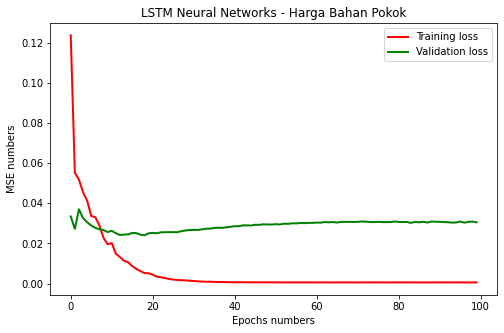

Epoch 1/100
20/20 [==============================] - 4s 40ms/step - loss: 0.1371 - accuracy: 0.7484 - val_loss: 0.0234 - val_accuracy: 0.4408
Epoch 2/100
20/20 [==============================] - 0s 10ms/step - loss: 0.1229 - accuracy: 0.7720 - val_loss: 0.0227 - val_accuracy: 0.4408
Epoch 3/100
20/20 [==============================] - 0s 11ms/step - loss: 0.1053 - accuracy: 0.7893 - val_loss: 0.0209 - val_accuracy: 0.4408
Epoch 4/100
20/20 [==============================] - 0s 11ms/step - loss: 0.0880 - accuracy: 0.7893 - val_loss: 0.0195 - val_accuracy: 0.4408
Epoch 5/100
20/20 [==============================] - 0s 10ms/step - loss: 0.0821 - accuracy: 0.8003 - val_loss: 0.0178 - val_accuracy: 0.4408
Epoch 6/100
20/20 [==============================] - 0s 11ms/step - loss: 0.0792 - accuracy: 0.7925 - val_loss: 0.0158 - val_accuracy: 0.4408
Epoch 7/100
20/20 [==============================] - 0s 10ms/step - loss: 0.0727 - accuracy: 0.8066 - val_loss: 0.0141 - val_accuracy: 0.4408
Epoch 

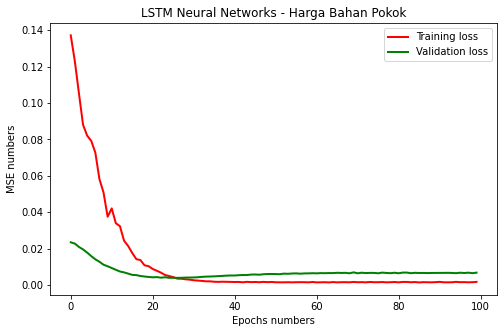

Epoch 1/100
20/20 [==============================] - 3s 38ms/step - loss: 0.3068 - accuracy: 0.5047 - val_loss: 0.1525 - val_accuracy: 0.3882
Epoch 2/100
20/20 [==============================] - 0s 10ms/step - loss: 0.2427 - accuracy: 0.5818 - val_loss: 0.0966 - val_accuracy: 0.4013
Epoch 3/100
20/20 [==============================] - 0s 11ms/step - loss: 0.1693 - accuracy: 0.6997 - val_loss: 0.0633 - val_accuracy: 0.4803
Epoch 4/100
20/20 [==============================] - 0s 10ms/step - loss: 0.1304 - accuracy: 0.7484 - val_loss: 0.0445 - val_accuracy: 0.4803
Epoch 5/100
20/20 [==============================] - 0s 11ms/step - loss: 0.1273 - accuracy: 0.7531 - val_loss: 0.0397 - val_accuracy: 0.4803
Epoch 6/100
20/20 [==============================] - 0s 11ms/step - loss: 0.1055 - accuracy: 0.7704 - val_loss: 0.0360 - val_accuracy: 0.4803
Epoch 7/100
20/20 [==============================] - 0s 11ms/step - loss: 0.1114 - accuracy: 0.7500 - val_loss: 0.0315 - val_accuracy: 0.4803
Epoch 

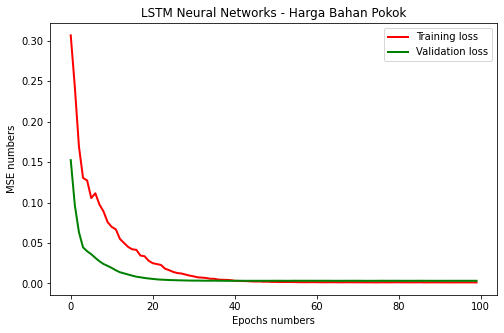

Epoch 1/100
20/20 [==============================] - 3s 45ms/step - loss: 0.1895 - accuracy: 0.6965 - val_loss: 0.0675 - val_accuracy: 0.4868
Epoch 2/100
20/20 [==============================] - 0s 10ms/step - loss: 0.1694 - accuracy: 0.7044 - val_loss: 0.0512 - val_accuracy: 0.4868
Epoch 3/100
20/20 [==============================] - 0s 10ms/step - loss: 0.1526 - accuracy: 0.7390 - val_loss: 0.0423 - val_accuracy: 0.4868
Epoch 4/100
20/20 [==============================] - 0s 10ms/step - loss: 0.1335 - accuracy: 0.7484 - val_loss: 0.0346 - val_accuracy: 0.4868
Epoch 5/100
20/20 [==============================] - 0s 10ms/step - loss: 0.1246 - accuracy: 0.7547 - val_loss: 0.0306 - val_accuracy: 0.4868
Epoch 6/100
20/20 [==============================] - 0s 11ms/step - loss: 0.1213 - accuracy: 0.7406 - val_loss: 0.0293 - val_accuracy: 0.4868
Epoch 7/100
20/20 [==============================] - 0s 10ms/step - loss: 0.0933 - accuracy: 0.7846 - val_loss: 0.0221 - val_accuracy: 0.4868
Epoch 

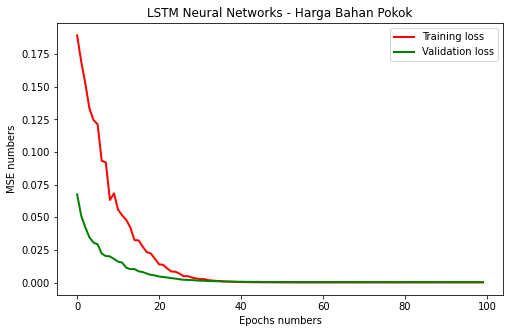

Epoch 1/100
20/20 [==============================] - 3s 39ms/step - loss: 0.1535 - accuracy: 0.6431 - val_loss: 0.0229 - val_accuracy: 0.0395
Epoch 2/100
20/20 [==============================] - 0s 10ms/step - loss: 0.1313 - accuracy: 0.6557 - val_loss: 0.0265 - val_accuracy: 0.0395
Epoch 3/100
20/20 [==============================] - 0s 11ms/step - loss: 0.1171 - accuracy: 0.6462 - val_loss: 0.0252 - val_accuracy: 0.0395
Epoch 4/100
20/20 [==============================] - 0s 11ms/step - loss: 0.0936 - accuracy: 0.6667 - val_loss: 0.0187 - val_accuracy: 0.0395
Epoch 5/100
20/20 [==============================] - 0s 11ms/step - loss: 0.0901 - accuracy: 0.6745 - val_loss: 0.0173 - val_accuracy: 0.0395
Epoch 6/100
20/20 [==============================] - 0s 11ms/step - loss: 0.0779 - accuracy: 0.6808 - val_loss: 0.0160 - val_accuracy: 0.0395
Epoch 7/100
20/20 [==============================] - 0s 11ms/step - loss: 0.0815 - accuracy: 0.6714 - val_loss: 0.0156 - val_accuracy: 0.0395
Epoch 

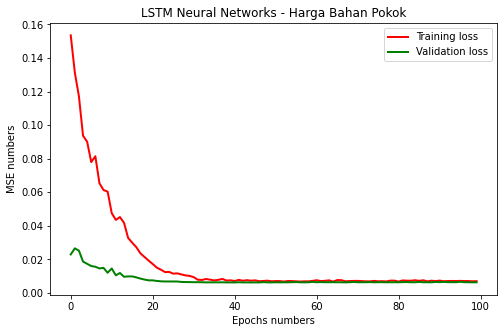

Epoch 1/100
20/20 [==============================] - 3s 40ms/step - loss: 0.3895 - accuracy: 0.4277 - val_loss: 0.2445 - val_accuracy: 0.0395
Epoch 2/100
20/20 [==============================] - 0s 11ms/step - loss: 0.2797 - accuracy: 0.5204 - val_loss: 0.0792 - val_accuracy: 0.0921
Epoch 3/100
20/20 [==============================] - 0s 10ms/step - loss: 0.2159 - accuracy: 0.5755 - val_loss: 0.0645 - val_accuracy: 0.1250
Epoch 4/100
20/20 [==============================] - 0s 11ms/step - loss: 0.2437 - accuracy: 0.5959 - val_loss: 0.0615 - val_accuracy: 0.1250
Epoch 5/100
20/20 [==============================] - 0s 12ms/step - loss: 0.1901 - accuracy: 0.6053 - val_loss: 0.0594 - val_accuracy: 0.1250
Epoch 6/100
20/20 [==============================] - 0s 12ms/step - loss: 0.1806 - accuracy: 0.5928 - val_loss: 0.0528 - val_accuracy: 0.1645
Epoch 7/100
20/20 [==============================] - 0s 11ms/step - loss: 0.1704 - accuracy: 0.6132 - val_loss: 0.0478 - val_accuracy: 0.1645
Epoch 

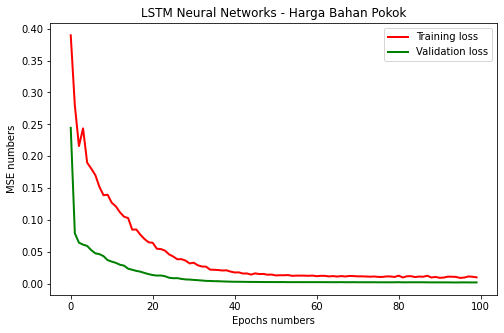

Epoch 1/100
20/20 [==============================] - 3s 41ms/step - loss: 0.6533 - accuracy: 0.3475 - val_loss: 0.5162 - val_accuracy: 0.0066
Epoch 2/100
20/20 [==============================] - 0s 11ms/step - loss: 0.4869 - accuracy: 0.4167 - val_loss: 0.3056 - val_accuracy: 0.0132
Epoch 3/100
20/20 [==============================] - 0s 11ms/step - loss: 0.3501 - accuracy: 0.5079 - val_loss: 0.2060 - val_accuracy: 0.0132
Epoch 4/100
20/20 [==============================] - 0s 11ms/step - loss: 0.3229 - accuracy: 0.5487 - val_loss: 0.1674 - val_accuracy: 0.0132
Epoch 5/100
20/20 [==============================] - 0s 12ms/step - loss: 0.2610 - accuracy: 0.5723 - val_loss: 0.1425 - val_accuracy: 0.0132
Epoch 6/100
20/20 [==============================] - 0s 11ms/step - loss: 0.2456 - accuracy: 0.5582 - val_loss: 0.1201 - val_accuracy: 0.0132
Epoch 7/100
20/20 [==============================] - 0s 12ms/step - loss: 0.2047 - accuracy: 0.5629 - val_loss: 0.1000 - val_accuracy: 0.0132
Epoch 

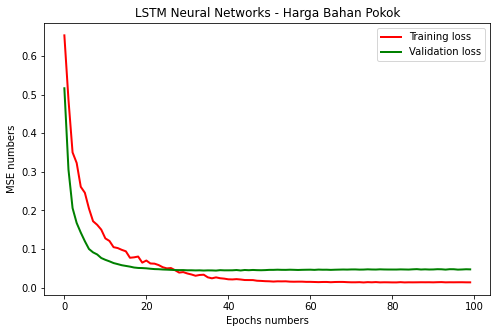

Epoch 1/100
20/20 [==============================] - 3s 39ms/step - loss: 0.2606 - accuracy: 0.4088 - val_loss: 0.0829 - val_accuracy: 0.0132
Epoch 2/100
20/20 [==============================] - 0s 11ms/step - loss: 0.1753 - accuracy: 0.5252 - val_loss: 0.0754 - val_accuracy: 0.0132
Epoch 3/100
20/20 [==============================] - 0s 11ms/step - loss: 0.1701 - accuracy: 0.5094 - val_loss: 0.0624 - val_accuracy: 0.0132
Epoch 4/100
20/20 [==============================] - 0s 11ms/step - loss: 0.1411 - accuracy: 0.5535 - val_loss: 0.0643 - val_accuracy: 0.0132
Epoch 5/100
20/20 [==============================] - 0s 12ms/step - loss: 0.1430 - accuracy: 0.5739 - val_loss: 0.0650 - val_accuracy: 0.0132
Epoch 6/100
20/20 [==============================] - 0s 11ms/step - loss: 0.1242 - accuracy: 0.5723 - val_loss: 0.0629 - val_accuracy: 0.0132
Epoch 7/100
20/20 [==============================] - 0s 12ms/step - loss: 0.1182 - accuracy: 0.5613 - val_loss: 0.0628 - val_accuracy: 0.0132
Epoch 

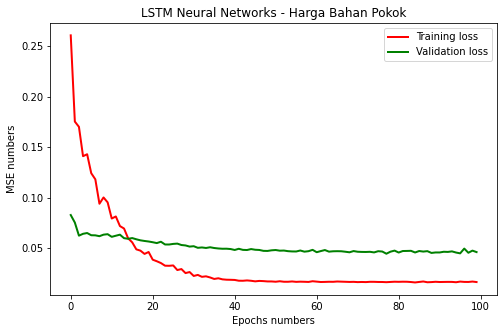

Epoch 1/100
20/20 [==============================] - 4s 80ms/step - loss: 0.2426 - accuracy: 0.5723 - val_loss: 0.2778 - val_accuracy: 0.0000e+00
Epoch 2/100
20/20 [==============================] - 0s 11ms/step - loss: 0.1713 - accuracy: 0.5645 - val_loss: 0.2386 - val_accuracy: 0.0000e+00
Epoch 3/100
20/20 [==============================] - 0s 11ms/step - loss: 0.1097 - accuracy: 0.5770 - val_loss: 0.2063 - val_accuracy: 0.0000e+00
Epoch 4/100
20/20 [==============================] - 0s 11ms/step - loss: 0.0986 - accuracy: 0.5739 - val_loss: 0.1946 - val_accuracy: 0.0000e+00
Epoch 5/100
20/20 [==============================] - 0s 12ms/step - loss: 0.0918 - accuracy: 0.5786 - val_loss: 0.1826 - val_accuracy: 0.0000e+00
Epoch 6/100
20/20 [==============================] - 0s 12ms/step - loss: 0.0888 - accuracy: 0.5739 - val_loss: 0.1727 - val_accuracy: 0.0000e+00
Epoch 7/100
20/20 [==============================] - 0s 11ms/step - loss: 0.0941 - accuracy: 0.5818 - val_loss: 0.1641 - val

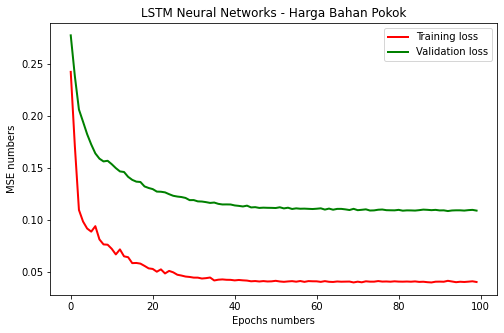

Epoch 1/100
20/20 [==============================] - 3s 42ms/step - loss: 0.2335 - accuracy: 0.4513 - val_loss: 0.0303 - val_accuracy: 0.0395
Epoch 2/100
20/20 [==============================] - 0s 12ms/step - loss: 0.1551 - accuracy: 0.5362 - val_loss: 0.0222 - val_accuracy: 0.0395
Epoch 3/100
20/20 [==============================] - 0s 11ms/step - loss: 0.1320 - accuracy: 0.5535 - val_loss: 0.0213 - val_accuracy: 0.0395
Epoch 4/100
20/20 [==============================] - 0s 12ms/step - loss: 0.1202 - accuracy: 0.5597 - val_loss: 0.0186 - val_accuracy: 0.0395
Epoch 5/100
20/20 [==============================] - 0s 11ms/step - loss: 0.1300 - accuracy: 0.5566 - val_loss: 0.0171 - val_accuracy: 0.0395
Epoch 6/100
20/20 [==============================] - 0s 12ms/step - loss: 0.1048 - accuracy: 0.5676 - val_loss: 0.0160 - val_accuracy: 0.0395
Epoch 7/100
20/20 [==============================] - 0s 12ms/step - loss: 0.1002 - accuracy: 0.5692 - val_loss: 0.0148 - val_accuracy: 0.0395
Epoch 

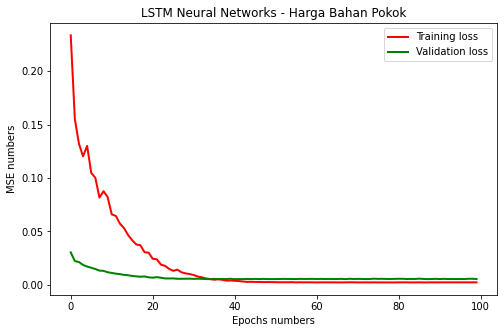

Epoch 1/100
20/20 [==============================] - 3s 39ms/step - loss: 0.3441 - accuracy: 0.5881 - val_loss: 0.0697 - val_accuracy: 0.0526
Epoch 2/100
20/20 [==============================] - 0s 10ms/step - loss: 0.1545 - accuracy: 0.5786 - val_loss: 0.0255 - val_accuracy: 0.0526
Epoch 3/100
20/20 [==============================] - 0s 11ms/step - loss: 0.1224 - accuracy: 0.5629 - val_loss: 0.0295 - val_accuracy: 0.0526
Epoch 4/100
20/20 [==============================] - 0s 11ms/step - loss: 0.1113 - accuracy: 0.5613 - val_loss: 0.0307 - val_accuracy: 0.0526
Epoch 5/100
20/20 [==============================] - 0s 12ms/step - loss: 0.0993 - accuracy: 0.5645 - val_loss: 0.0282 - val_accuracy: 0.0526
Epoch 6/100
20/20 [==============================] - 0s 11ms/step - loss: 0.0981 - accuracy: 0.5503 - val_loss: 0.0262 - val_accuracy: 0.0526
Epoch 7/100
20/20 [==============================] - 0s 11ms/step - loss: 0.0886 - accuracy: 0.5676 - val_loss: 0.0232 - val_accuracy: 0.0526
Epoch 

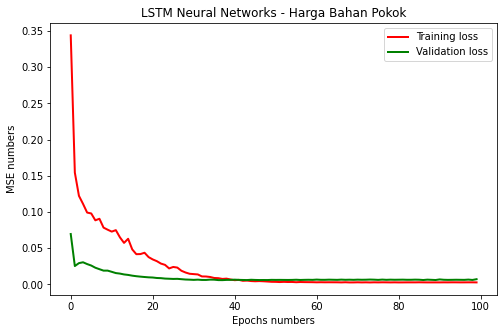

In [ ]:
#parameter tuning
aim = df.columns
window_len = 10
test_size = 0.2
zero_base = True
lstm_neurons = 50
epochs = 100
batch_size = 32
loss = 'mse'
dropout = 0.24
optimizer = 'adam'

#run model LSTM
MAE = []
for i in aim:
  train_data, test_data, X_train, X_test, y_train, y_test = prepare_data(
                                                            df, aim = i, window_len=window_len, zero_base=zero_base, test_size=test_size)
  
  model = model_lstm(X_train, output_size=1, neurons=lstm_neurons, dropout=dropout, loss=loss, optimizer=optimizer)
  modelfit = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=1, shuffle=True)
  #targets = test_data[i][window_len:]
  preds = model.predict(X_test).squeeze()
  MAE.append(mean_absolute_error(preds, y_test))

  plt.figure(figsize=(8, 5))
  plt.plot(modelfit.history['loss'],'r',linewidth=2, label='Training loss')
  plt.plot(modelfit.history['val_loss'], 'g',linewidth=2, label='Validation loss')
  plt.title('LSTM Neural Networks - Harga Bahan Pokok')
  plt.xlabel('Epochs numbers')
  plt.ylabel('MSE numbers')
  plt.legend()
  plt.show()

`data (df) dengan scalling`

Epoch 1/100
20/20 [==============================] - 3s 37ms/step - loss: 0.9366 - accuracy: 0.5582 - val_loss: 0.6500 - val_accuracy: 0.5592
Epoch 2/100
20/20 [==============================] - 0s 11ms/step - loss: 0.5522 - accuracy: 0.5582 - val_loss: 0.3708 - val_accuracy: 0.5592
Epoch 3/100
20/20 [==============================] - 0s 10ms/step - loss: 0.3721 - accuracy: 0.5566 - val_loss: 0.1980 - val_accuracy: 0.5592
Epoch 4/100
20/20 [==============================] - 0s 9ms/step - loss: 0.2231 - accuracy: 0.5550 - val_loss: 0.1040 - val_accuracy: 0.5592
Epoch 5/100
20/20 [==============================] - 0s 10ms/step - loss: 0.1595 - accuracy: 0.5440 - val_loss: 0.0586 - val_accuracy: 0.5592
Epoch 6/100
20/20 [==============================] - 0s 10ms/step - loss: 0.1334 - accuracy: 0.5425 - val_loss: 0.0364 - val_accuracy: 0.5592
Epoch 7/100
20/20 [==============================] - 0s 10ms/step - loss: 0.1226 - accuracy: 0.5425 - val_loss: 0.0265 - val_accuracy: 0.5592
Epoch 8

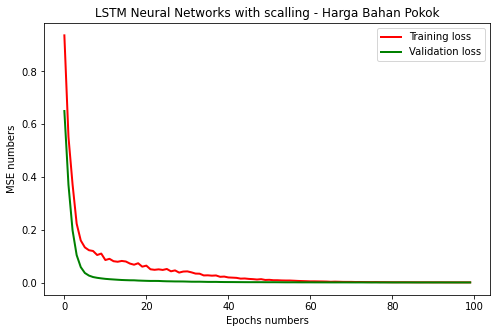

Epoch 1/100
20/20 [==============================] - 4s 38ms/step - loss: 0.1338 - accuracy: 0.4921 - val_loss: 0.0220 - val_accuracy: 0.2697
Epoch 2/100
20/20 [==============================] - 0s 9ms/step - loss: 0.1137 - accuracy: 0.4953 - val_loss: 0.0174 - val_accuracy: 0.2697
Epoch 3/100
20/20 [==============================] - 0s 9ms/step - loss: 0.1004 - accuracy: 0.5031 - val_loss: 0.0157 - val_accuracy: 0.2697
Epoch 4/100
20/20 [==============================] - 0s 10ms/step - loss: 0.0995 - accuracy: 0.4906 - val_loss: 0.0143 - val_accuracy: 0.2697
Epoch 5/100
20/20 [==============================] - 0s 10ms/step - loss: 0.0698 - accuracy: 0.5220 - val_loss: 0.0147 - val_accuracy: 0.2697
Epoch 6/100
20/20 [==============================] - 0s 9ms/step - loss: 0.0734 - accuracy: 0.5220 - val_loss: 0.0117 - val_accuracy: 0.2697
Epoch 7/100
20/20 [==============================] - 0s 9ms/step - loss: 0.0653 - accuracy: 0.5283 - val_loss: 0.0121 - val_accuracy: 0.2697
Epoch 8/10

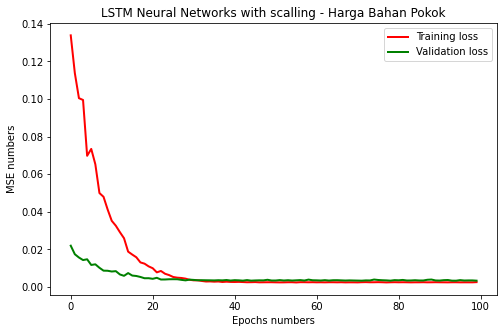

Epoch 1/100
20/20 [==============================] - 3s 40ms/step - loss: 1.5390 - accuracy: 0.5692 - val_loss: 1.0201 - val_accuracy: 0.2961
Epoch 2/100
20/20 [==============================] - 0s 10ms/step - loss: 1.1302 - accuracy: 0.5692 - val_loss: 0.6402 - val_accuracy: 0.2961
Epoch 3/100
20/20 [==============================] - 0s 11ms/step - loss: 0.6990 - accuracy: 0.5692 - val_loss: 0.3694 - val_accuracy: 0.2961
Epoch 4/100
20/20 [==============================] - 0s 10ms/step - loss: 0.4839 - accuracy: 0.5676 - val_loss: 0.2397 - val_accuracy: 0.2961
Epoch 5/100
20/20 [==============================] - 0s 10ms/step - loss: 0.3606 - accuracy: 0.5629 - val_loss: 0.1557 - val_accuracy: 0.2961
Epoch 6/100
20/20 [==============================] - 0s 10ms/step - loss: 0.2545 - accuracy: 0.5503 - val_loss: 0.0847 - val_accuracy: 0.2961
Epoch 7/100
20/20 [==============================] - 0s 10ms/step - loss: 0.1701 - accuracy: 0.5487 - val_loss: 0.0711 - val_accuracy: 0.2961
Epoch 

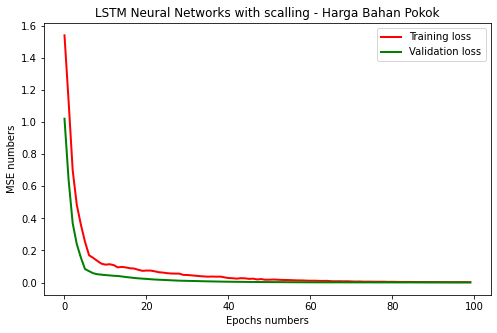

Epoch 1/100
20/20 [==============================] - 3s 39ms/step - loss: 0.5865 - accuracy: 0.2783 - val_loss: 0.2133 - val_accuracy: 0.0921
Epoch 2/100
20/20 [==============================] - 0s 10ms/step - loss: 0.3935 - accuracy: 0.3695 - val_loss: 0.1161 - val_accuracy: 0.1118
Epoch 3/100
20/20 [==============================] - 0s 10ms/step - loss: 0.2716 - accuracy: 0.4717 - val_loss: 0.0860 - val_accuracy: 0.1382
Epoch 4/100
20/20 [==============================] - 0s 12ms/step - loss: 0.2025 - accuracy: 0.5220 - val_loss: 0.0787 - val_accuracy: 0.1447
Epoch 5/100
20/20 [==============================] - 0s 10ms/step - loss: 0.1796 - accuracy: 0.5409 - val_loss: 0.0749 - val_accuracy: 0.1447
Epoch 6/100
20/20 [==============================] - 0s 10ms/step - loss: 0.1461 - accuracy: 0.5440 - val_loss: 0.0695 - val_accuracy: 0.1447
Epoch 7/100
20/20 [==============================] - 0s 10ms/step - loss: 0.1323 - accuracy: 0.5566 - val_loss: 0.0657 - val_accuracy: 0.1447
Epoch 

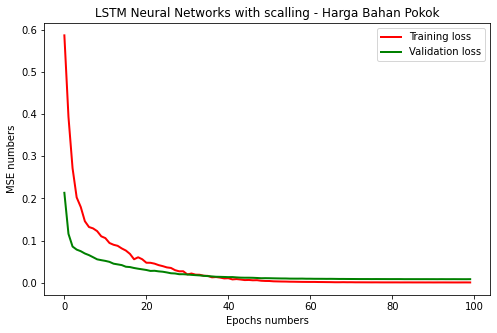

Epoch 1/100
20/20 [==============================] - 3s 38ms/step - loss: 0.2508 - accuracy: 0.4638 - val_loss: 0.2038 - val_accuracy: 0.0329
Epoch 2/100
20/20 [==============================] - 0s 11ms/step - loss: 0.1835 - accuracy: 0.5503 - val_loss: 0.1238 - val_accuracy: 0.0395
Epoch 3/100
20/20 [==============================] - 0s 10ms/step - loss: 0.1420 - accuracy: 0.5660 - val_loss: 0.0859 - val_accuracy: 0.0395
Epoch 4/100
20/20 [==============================] - 0s 10ms/step - loss: 0.1272 - accuracy: 0.5943 - val_loss: 0.0675 - val_accuracy: 0.0461
Epoch 5/100
20/20 [==============================] - 0s 10ms/step - loss: 0.1126 - accuracy: 0.6116 - val_loss: 0.0601 - val_accuracy: 0.0461
Epoch 6/100
20/20 [==============================] - 0s 10ms/step - loss: 0.1093 - accuracy: 0.6101 - val_loss: 0.0576 - val_accuracy: 0.0461
Epoch 7/100
20/20 [==============================] - 0s 10ms/step - loss: 0.1071 - accuracy: 0.6179 - val_loss: 0.0526 - val_accuracy: 0.0461
Epoch 

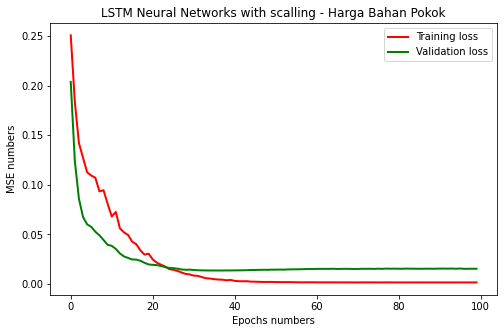

Epoch 1/100
20/20 [==============================] - 4s 39ms/step - loss: 0.2814 - accuracy: 0.4733 - val_loss: 0.1694 - val_accuracy: 0.0526
Epoch 2/100
20/20 [==============================] - 0s 10ms/step - loss: 0.1762 - accuracy: 0.5692 - val_loss: 0.0889 - val_accuracy: 0.0987
Epoch 3/100
20/20 [==============================] - 0s 12ms/step - loss: 0.1027 - accuracy: 0.6745 - val_loss: 0.0548 - val_accuracy: 0.0987
Epoch 4/100
20/20 [==============================] - 0s 10ms/step - loss: 0.0761 - accuracy: 0.7343 - val_loss: 0.0377 - val_accuracy: 0.0987
Epoch 5/100
20/20 [==============================] - 0s 11ms/step - loss: 0.0658 - accuracy: 0.7421 - val_loss: 0.0359 - val_accuracy: 0.0987
Epoch 6/100
20/20 [==============================] - 0s 10ms/step - loss: 0.0616 - accuracy: 0.7610 - val_loss: 0.0421 - val_accuracy: 0.0987
Epoch 7/100
20/20 [==============================] - 0s 10ms/step - loss: 0.0570 - accuracy: 0.7610 - val_loss: 0.0398 - val_accuracy: 0.0987
Epoch 

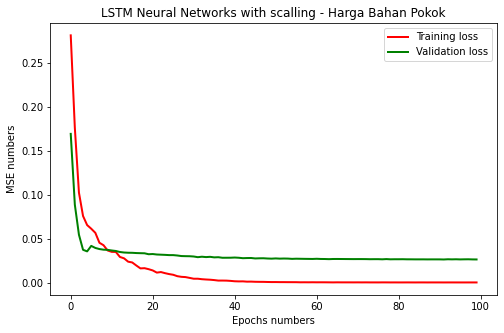

Epoch 1/100
20/20 [==============================] - 3s 39ms/step - loss: 0.1178 - accuracy: 0.8066 - val_loss: 0.0209 - val_accuracy: 0.4408
Epoch 2/100
20/20 [==============================] - 0s 10ms/step - loss: 0.1131 - accuracy: 0.7720 - val_loss: 0.0188 - val_accuracy: 0.4408
Epoch 3/100
20/20 [==============================] - 0s 11ms/step - loss: 0.0919 - accuracy: 0.7972 - val_loss: 0.0147 - val_accuracy: 0.4408
Epoch 4/100
20/20 [==============================] - 0s 10ms/step - loss: 0.0864 - accuracy: 0.8019 - val_loss: 0.0140 - val_accuracy: 0.4408
Epoch 5/100
20/20 [==============================] - 0s 10ms/step - loss: 0.0741 - accuracy: 0.7987 - val_loss: 0.0122 - val_accuracy: 0.4408
Epoch 6/100
20/20 [==============================] - 0s 10ms/step - loss: 0.0751 - accuracy: 0.8192 - val_loss: 0.0101 - val_accuracy: 0.4408
Epoch 7/100
20/20 [==============================] - 0s 11ms/step - loss: 0.0613 - accuracy: 0.8129 - val_loss: 0.0091 - val_accuracy: 0.4408
Epoch 

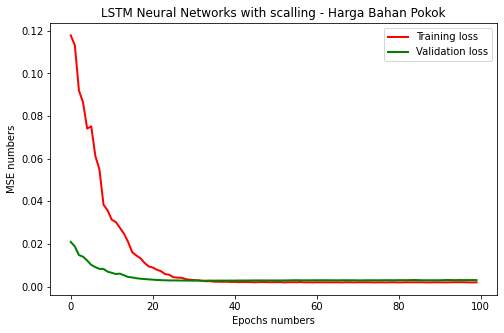

Epoch 1/100
20/20 [==============================] - 3s 40ms/step - loss: 0.1826 - accuracy: 0.6918 - val_loss: 0.0209 - val_accuracy: 0.4803
Epoch 2/100
20/20 [==============================] - 0s 10ms/step - loss: 0.1435 - accuracy: 0.7343 - val_loss: 0.0164 - val_accuracy: 0.4803
Epoch 3/100
20/20 [==============================] - 0s 11ms/step - loss: 0.1394 - accuracy: 0.7437 - val_loss: 0.0143 - val_accuracy: 0.4803
Epoch 4/100
20/20 [==============================] - 0s 10ms/step - loss: 0.1258 - accuracy: 0.7594 - val_loss: 0.0132 - val_accuracy: 0.4803
Epoch 5/100
20/20 [==============================] - 0s 10ms/step - loss: 0.1043 - accuracy: 0.7626 - val_loss: 0.0110 - val_accuracy: 0.4803
Epoch 6/100
20/20 [==============================] - 0s 12ms/step - loss: 0.0926 - accuracy: 0.7752 - val_loss: 0.0102 - val_accuracy: 0.4803
Epoch 7/100
20/20 [==============================] - 0s 10ms/step - loss: 0.0946 - accuracy: 0.7626 - val_loss: 0.0091 - val_accuracy: 0.4803
Epoch 

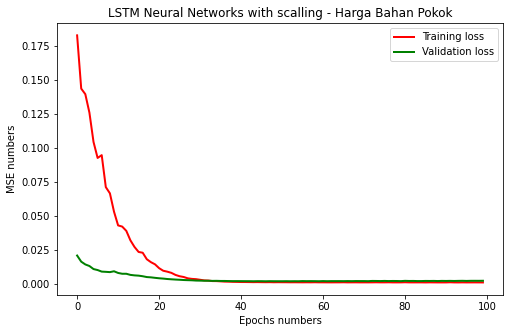

Epoch 1/100
20/20 [==============================] - 3s 38ms/step - loss: 0.0731 - accuracy: 0.8113 - val_loss: 0.0314 - val_accuracy: 0.4868
Epoch 2/100
20/20 [==============================] - 0s 11ms/step - loss: 0.0614 - accuracy: 0.8066 - val_loss: 0.0376 - val_accuracy: 0.4868
Epoch 3/100
20/20 [==============================] - 0s 10ms/step - loss: 0.0471 - accuracy: 0.8066 - val_loss: 0.0390 - val_accuracy: 0.4868
Epoch 4/100
20/20 [==============================] - 0s 11ms/step - loss: 0.0417 - accuracy: 0.8145 - val_loss: 0.0270 - val_accuracy: 0.4868
Epoch 5/100
20/20 [==============================] - 0s 11ms/step - loss: 0.0421 - accuracy: 0.8097 - val_loss: 0.0233 - val_accuracy: 0.4868
Epoch 6/100
20/20 [==============================] - 0s 11ms/step - loss: 0.0321 - accuracy: 0.8145 - val_loss: 0.0210 - val_accuracy: 0.4868
Epoch 7/100
20/20 [==============================] - 0s 11ms/step - loss: 0.0263 - accuracy: 0.8176 - val_loss: 0.0205 - val_accuracy: 0.4868
Epoch 

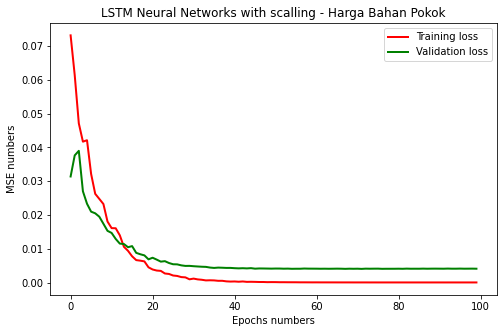

Epoch 1/100
20/20 [==============================] - 3s 39ms/step - loss: 0.3729 - accuracy: 0.6950 - val_loss: 0.0361 - val_accuracy: 0.0395
Epoch 2/100
20/20 [==============================] - 0s 12ms/step - loss: 0.1798 - accuracy: 0.6792 - val_loss: 0.0208 - val_accuracy: 0.0395
Epoch 3/100
20/20 [==============================] - 0s 10ms/step - loss: 0.1489 - accuracy: 0.6730 - val_loss: 0.0148 - val_accuracy: 0.0395
Epoch 4/100
20/20 [==============================] - 0s 10ms/step - loss: 0.1252 - accuracy: 0.6604 - val_loss: 0.0159 - val_accuracy: 0.0395
Epoch 5/100
20/20 [==============================] - 0s 11ms/step - loss: 0.1202 - accuracy: 0.6541 - val_loss: 0.0162 - val_accuracy: 0.0395
Epoch 6/100
20/20 [==============================] - 0s 11ms/step - loss: 0.1087 - accuracy: 0.6619 - val_loss: 0.0152 - val_accuracy: 0.0395
Epoch 7/100
20/20 [==============================] - 0s 11ms/step - loss: 0.1088 - accuracy: 0.6525 - val_loss: 0.0125 - val_accuracy: 0.0395
Epoch 

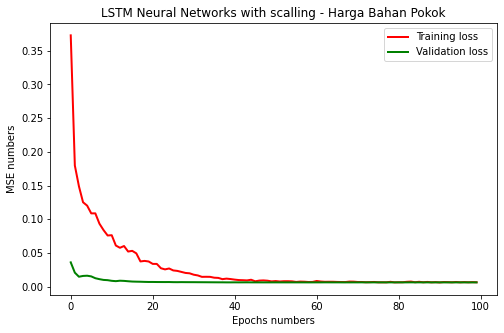

Epoch 1/100
20/20 [==============================] - 3s 40ms/step - loss: 0.2055 - accuracy: 0.6918 - val_loss: 0.0336 - val_accuracy: 0.1645
Epoch 2/100
20/20 [==============================] - 0s 11ms/step - loss: 0.1018 - accuracy: 0.6903 - val_loss: 0.0193 - val_accuracy: 0.1645
Epoch 3/100
20/20 [==============================] - 0s 10ms/step - loss: 0.0891 - accuracy: 0.6808 - val_loss: 0.0158 - val_accuracy: 0.1645
Epoch 4/100
20/20 [==============================] - 0s 10ms/step - loss: 0.0813 - accuracy: 0.6761 - val_loss: 0.0143 - val_accuracy: 0.1645
Epoch 5/100
20/20 [==============================] - 0s 11ms/step - loss: 0.0765 - accuracy: 0.6777 - val_loss: 0.0128 - val_accuracy: 0.1645
Epoch 6/100
20/20 [==============================] - 0s 12ms/step - loss: 0.0686 - accuracy: 0.6824 - val_loss: 0.0113 - val_accuracy: 0.1645
Epoch 7/100
20/20 [==============================] - 0s 12ms/step - loss: 0.0695 - accuracy: 0.6855 - val_loss: 0.0102 - val_accuracy: 0.1645
Epoch 

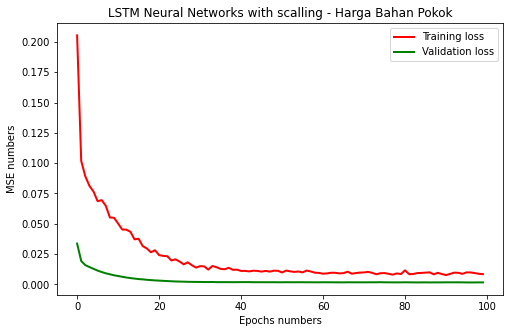

Epoch 1/100
20/20 [==============================] - 3s 39ms/step - loss: 0.1968 - accuracy: 0.6038 - val_loss: 0.2212 - val_accuracy: 0.0132
Epoch 2/100
20/20 [==============================] - 0s 12ms/step - loss: 0.1690 - accuracy: 0.6116 - val_loss: 0.1987 - val_accuracy: 0.0132
Epoch 3/100
20/20 [==============================] - 0s 11ms/step - loss: 0.1498 - accuracy: 0.6305 - val_loss: 0.1789 - val_accuracy: 0.0132
Epoch 4/100
20/20 [==============================] - 0s 11ms/step - loss: 0.1275 - accuracy: 0.6415 - val_loss: 0.1597 - val_accuracy: 0.0132
Epoch 5/100
20/20 [==============================] - 0s 12ms/step - loss: 0.1108 - accuracy: 0.6478 - val_loss: 0.1421 - val_accuracy: 0.0132
Epoch 6/100
20/20 [==============================] - 0s 12ms/step - loss: 0.1013 - accuracy: 0.6588 - val_loss: 0.1286 - val_accuracy: 0.0132
Epoch 7/100
20/20 [==============================] - 0s 11ms/step - loss: 0.0847 - accuracy: 0.6557 - val_loss: 0.1159 - val_accuracy: 0.0132
Epoch 

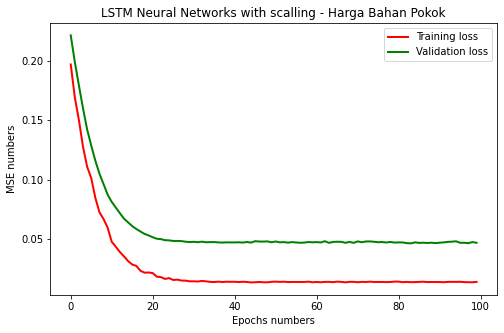

Epoch 1/100
20/20 [==============================] - 4s 79ms/step - loss: 0.1658 - accuracy: 0.5849 - val_loss: 0.0904 - val_accuracy: 0.0132
Epoch 2/100
20/20 [==============================] - 0s 11ms/step - loss: 0.1421 - accuracy: 0.5566 - val_loss: 0.0855 - val_accuracy: 0.0132
Epoch 3/100
20/20 [==============================] - 0s 11ms/step - loss: 0.1300 - accuracy: 0.5833 - val_loss: 0.0860 - val_accuracy: 0.0132
Epoch 4/100
20/20 [==============================] - 0s 11ms/step - loss: 0.1042 - accuracy: 0.5833 - val_loss: 0.0823 - val_accuracy: 0.0132
Epoch 5/100
20/20 [==============================] - 0s 11ms/step - loss: 0.0948 - accuracy: 0.5833 - val_loss: 0.0814 - val_accuracy: 0.0132
Epoch 6/100
20/20 [==============================] - 0s 11ms/step - loss: 0.0883 - accuracy: 0.5928 - val_loss: 0.0779 - val_accuracy: 0.0132
Epoch 7/100
20/20 [==============================] - 0s 11ms/step - loss: 0.0868 - accuracy: 0.5928 - val_loss: 0.0792 - val_accuracy: 0.0132
Epoch 

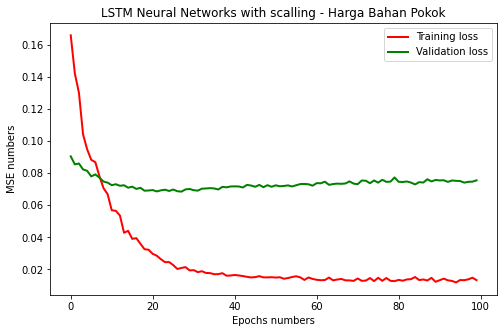

Epoch 1/100
20/20 [==============================] - 3s 40ms/step - loss: 0.8197 - accuracy: 0.5802 - val_loss: 0.5467 - val_accuracy: 0.0000e+00
Epoch 2/100
20/20 [==============================] - 0s 11ms/step - loss: 0.5054 - accuracy: 0.5818 - val_loss: 0.3143 - val_accuracy: 0.0000e+00
Epoch 3/100
20/20 [==============================] - 0s 11ms/step - loss: 0.3366 - accuracy: 0.5723 - val_loss: 0.2151 - val_accuracy: 0.0000e+00
Epoch 4/100
20/20 [==============================] - 0s 11ms/step - loss: 0.2532 - accuracy: 0.5566 - val_loss: 0.1618 - val_accuracy: 0.0000e+00
Epoch 5/100
20/20 [==============================] - 0s 12ms/step - loss: 0.1945 - accuracy: 0.5472 - val_loss: 0.1490 - val_accuracy: 0.0000e+00
Epoch 6/100
20/20 [==============================] - 0s 12ms/step - loss: 0.1741 - accuracy: 0.5456 - val_loss: 0.1444 - val_accuracy: 0.0000e+00
Epoch 7/100
20/20 [==============================] - 0s 10ms/step - loss: 0.1685 - accuracy: 0.5582 - val_loss: 0.1413 - val

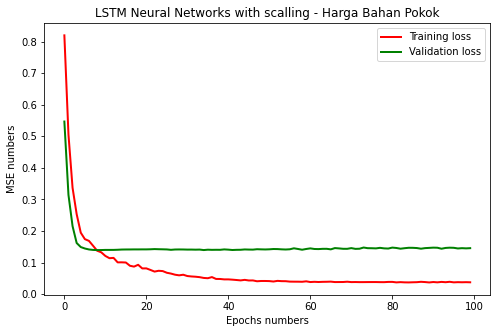

Epoch 1/100
20/20 [==============================] - 3s 39ms/step - loss: 0.1702 - accuracy: 0.5267 - val_loss: 0.0701 - val_accuracy: 0.0395
Epoch 2/100
20/20 [==============================] - 0s 11ms/step - loss: 0.1457 - accuracy: 0.5818 - val_loss: 0.0608 - val_accuracy: 0.0395
Epoch 3/100
20/20 [==============================] - 0s 14ms/step - loss: 0.1240 - accuracy: 0.5739 - val_loss: 0.0563 - val_accuracy: 0.0395
Epoch 4/100
20/20 [==============================] - 0s 11ms/step - loss: 0.1180 - accuracy: 0.5723 - val_loss: 0.0550 - val_accuracy: 0.0395
Epoch 5/100
20/20 [==============================] - 0s 12ms/step - loss: 0.1074 - accuracy: 0.5833 - val_loss: 0.0478 - val_accuracy: 0.0395
Epoch 6/100
20/20 [==============================] - 0s 11ms/step - loss: 0.0882 - accuracy: 0.5912 - val_loss: 0.0434 - val_accuracy: 0.0395
Epoch 7/100
20/20 [==============================] - 0s 12ms/step - loss: 0.0823 - accuracy: 0.5928 - val_loss: 0.0420 - val_accuracy: 0.0395
Epoch 

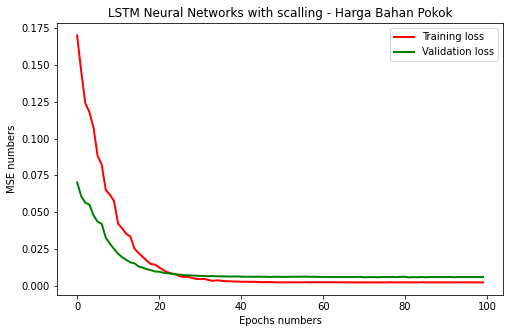

Epoch 1/100
20/20 [==============================] - 3s 39ms/step - loss: 0.2496 - accuracy: 0.5959 - val_loss: 0.1346 - val_accuracy: 0.0526
Epoch 2/100
20/20 [==============================] - 0s 11ms/step - loss: 0.1296 - accuracy: 0.5943 - val_loss: 0.0614 - val_accuracy: 0.0526
Epoch 3/100
20/20 [==============================] - 0s 11ms/step - loss: 0.0867 - accuracy: 0.5849 - val_loss: 0.0304 - val_accuracy: 0.0526
Epoch 4/100
20/20 [==============================] - 0s 12ms/step - loss: 0.0748 - accuracy: 0.5912 - val_loss: 0.0199 - val_accuracy: 0.0526
Epoch 5/100
20/20 [==============================] - 0s 10ms/step - loss: 0.0598 - accuracy: 0.5739 - val_loss: 0.0172 - val_accuracy: 0.0526
Epoch 6/100
20/20 [==============================] - 0s 12ms/step - loss: 0.0669 - accuracy: 0.5881 - val_loss: 0.0164 - val_accuracy: 0.0526
Epoch 7/100
20/20 [==============================] - 0s 12ms/step - loss: 0.0568 - accuracy: 0.5833 - val_loss: 0.0152 - val_accuracy: 0.0526
Epoch 

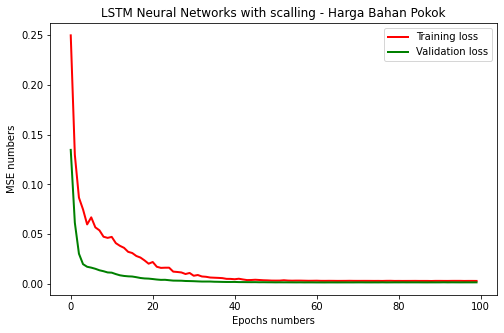

In [ ]:
def normal_min_max(continuous):
    return (continuous - continuous.min()) / (df.max() - continuous.min())

df_minmax = normal_min_max(df)

#run model LSTM
MAE2 = []
for i in aim:
  train_data, test_data, X_train, X_test, y_train, y_test = prepare_data(
                                                            df_minmax, aim = i, window_len=window_len, zero_base=zero_base, test_size=test_size)
  
  model = model_lstm(X_train, output_size=1, neurons=lstm_neurons, dropout=dropout, loss=loss, optimizer=optimizer)
  modelfit = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=1, shuffle=True)
  #targets = test_data[i][window_len:]
  preds = model.predict(X_test).squeeze()
  MAE2.append(mean_absolute_error(preds, y_test))

  plt.figure(figsize=(8, 5))
  plt.plot(modelfit.history['loss'],'r',linewidth=2, label='Training loss')
  plt.plot(modelfit.history['val_loss'], 'g',linewidth=2, label='Validation loss')
  plt.title('LSTM Neural Networks with scalling - Harga Bahan Pokok')
  plt.xlabel('Epochs numbers')
  plt.ylabel('MSE numbers')
  plt.legend()
  plt.show()

In [ ]:
LSTM = pd.DataFrame(list(zip(aim, MAE, MAE2)),columns =['Jenis Bahan Pokok', 'MAE tanpa minmax', 'MAE dengan minmax'])
print(LSTM)
print('\nrata-rata MAE tanpa minmax = ',LSTM['MAE tanpa minmax'].mean())
print('rata-rata MAE dengan minmax = ',LSTM['MAE dengan minmax'].mean())

                  Jenis Bahan Pokok  MAE tanpa minmax  MAE dengan minmax
0                     Beras Premium          0.006691           0.010866
1                      Beras Medium          0.017221           0.035751
2                        Gula Pasir          0.019784           0.021277
3               Minyak Goreng Curah          0.077603           0.068644
4   Minyak Goreng Kemasan Sederhana          0.086146           0.084044
5     Minyak Goreng Kemasan Premium          0.115660           0.101611
6                     Kedelai Impor          0.042827           0.030479
7                     Tepung Terigu          0.031599           0.031707
8         Daging Sapi Paha Belakang          0.010548           0.026838
9                   Daging Ayam Ras          0.060042           0.060141
10                   Telur Ayam Ras          0.035620           0.027548
11                 Cabe Merah Besar          0.167352           0.165683
12             Cabe Merah  Keriting          0.1676

***didapatkan rata-rata MAE model LSTM `tanpa minmax lebih kecil dibanding dengan minmax`***

#KESIMPULAN

dengan karakteristik memiliki trend dan pola musiman dicoba kedua model yang memungkinkan yaitu 

eksponensial smoothing dan long short time model dan didapatkan :

`Model LSTM memberikan akurasi lebih baik dibanding ETS`

`Model LSTM tanpa normalisasi minmax lebih baik dibanding menggunakan normalisasi minmax`
